### Advanced Python AI and ML Tools - Assignment 1

__Group Members:__
1) Aanal Patel - C0910376
2) Bimal Shresta - C0919385
3) Danilo Diaz - C0889539
4) Ernie Sumoso - C0881591

### Index
- __Step 1. Dataset Description (web scrapped)__
- __Step 2. Data Wrangling (cleaning, formatting, structuring, validating)__
    - __Step 9. NLP techniques: data cleaning, stopword and puctuation removal, tokenizing, ngrams analysis__
- __Step 3. Plotting methods for distribution__
- __Step 4. Pandas profiling for EDA (exploratory data analysis)__
- __Step 5. Encoding methods, creating new numerical columns__
- __Step 6. Outlier identification (with boxplots and IQR)__
- __Step 7. Addressing outliers with Quantile-based flooring and capping, Trimming, and Log Transformation__
- __Step 8. Unsupervised learning methods__

### Step 1. Dataset Description (web scrapped)

Let's import our web scrapped dataset and do some exploration.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# reading the web scrapped data from CSV file, setting the index column
df = pd.read_csv("job_data.csv", index_col=0)

# displaying the raw data
df.tail()

,job_title,company,salary,job_location,post,job_type,job_desc,company_qns,job_posted_date,job_link
2610,Level 2/3 Support Engineer,Fuse Technology Pty Ltd,NaN,Sydney NSW,Help Desk & IT Support (Information & Communic...,Full time,The opportunityAs part of our exciting growth ...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73930150?type=stan...
2611,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,Labourforce,$47 per hour + penalties,"Wetherill Park, Sydney NSW","Warehousing, Storage & Distribution (Manufactu...",Contract/Temp,Our client is one of Australia's leading Manuf...,NaN,2024-02-21,https://www.seek.com.au/job/73870879?type=stan...
2612,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...
2613,Studio Assistant,Cendre,NaN,"Oxenford, Gold Coast QLD","Pickers & Packers (Manufacturing, Transport & ...",Full time,Cendré is a revered e-commerce jewellery brand...,NaN,2024-02-21,https://www.seek.com.au/job/73875587?type=stan...
2614,Junior IT Support Officer,Hare & Forbes,NaN,"Northmead, Sydney NSW",Help Desk & IT Support (Information & Communic...,Full time,"Parramatta locationWork with a close-knit, exp...",Do you have demonstrated experience diagnosing...,2024-02-21,https://www.seek.com.au/job/73868216?type=stan...


In [112]:
# display the number of rows, columns and the column names
def display_shape_and_colnames(df):
    print("Number of Rows:", df.shape[0])
    print("Number of Columns:", df.shape[1])
    print(df.columns)
    
display_shape_and_colnames(df)

Number of Rows: 9800
Number of Columns: 10
Index(['job_title', 'company', 'salary', 'job_location', 'post', 'job_type',
       'job_desc', 'company_qns', 'job_posted_date', 'job_link'],
      dtype='object')


Some of our __column names__ are __redundant__ because we are working with job data.

Let's delete the prefix __"job"__ from our column names.

Some other __column names__ are __abbreviated__ (e.g. "job_desc", "company_qns").

Let's __replace them with full names__ so we can have accurate column names.

In [113]:
def clean_colnames(df):
    # delete the prefix "job_" on our column names
    for column_name in df.columns.to_list():
        if column_name.startswith("job_"):
            df.rename(columns={column_name : column_name.lstrip("job_")}, inplace=True)

    # rename abbreviated column names
    df.rename(columns={'desc':'description', 'company_qns':'company_questions', 'post':'department'}, inplace=True)

clean_colnames(df)
# display clean column names
df.head(2)

,title,company,salary,location,department,type,description,company_questions,posted_date,link
0,Experienced Support Worker (PPT & CAS),Ability Gateway,$35.50 per hour [PPT],"Wagga Wagga, Wagga Wagga & Riverina NSW",Aged & Disability Support (Community Services ...,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...
1,Regional Manager - Inspire@HOME,CatholicCare Tasmania,NaN,"Launceston, Launceston & North East TAS","Child Welfare, Youth & Family Services (Commun...",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...


Now let's undestand all of our columns by providing a description to each one:
- __title__: title of the posted job
- __company__: name of the company that has posted the job
- __salary__: salary range for the job, can be defined per hour, monthly, annually, etc.
- __location__: geographical location of the job or company
- __department__: field or department of the job (e.g. IT, Sales, etc.)
- __description__: long description of the job posting
- __company_questions__: questions issued by the company to the applicants, according to the post
- __posted_date__: format yyyy-mm-dd
- __link__: link of the job posting

Now that we have a general understanding of our web scrapped data. 

Let's go ahead to the next step to perform our data wrangling methods.

### __Step 2.__ Data Wrangling (cleaning, formatting, structuring, validating)
### (includes __Step 9.__ NLP techniques: data cleaning, stopword and puctuation removal, tokenizing, ngrams analysis)

First of all, we have 9800 rows, however the index values are repetead thrice because of the CSV contents.

Let's start by reseting the index to have proper index values.

In [114]:
# reset the rows index
df.reset_index(inplace=True, drop=True)
df.tail()

,title,company,salary,location,department,type,description,company_questions,posted_date,link
9795,Level 2/3 Support Engineer,Fuse Technology Pty Ltd,NaN,Sydney NSW,Help Desk & IT Support (Information & Communic...,Full time,The opportunityAs part of our exciting growth ...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73930150?type=stan...
9796,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,Labourforce,$47 per hour + penalties,"Wetherill Park, Sydney NSW","Warehousing, Storage & Distribution (Manufactu...",Contract/Temp,Our client is one of Australia's leading Manuf...,NaN,2024-02-21,https://www.seek.com.au/job/73870879?type=stan...
9797,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...
9798,Studio Assistant,Cendre,NaN,"Oxenford, Gold Coast QLD","Pickers & Packers (Manufacturing, Transport & ...",Full time,Cendré is a revered e-commerce jewellery brand...,NaN,2024-02-21,https://www.seek.com.au/job/73875587?type=stan...
9799,Junior IT Support Officer,Hare & Forbes,NaN,"Northmead, Sydney NSW",Help Desk & IT Support (Information & Communic...,Full time,"Parramatta locationWork with a close-knit, exp...",Do you have demonstrated experience diagnosing...,2024-02-21,https://www.seek.com.au/job/73868216?type=stan...


Now, let's perform some basic analysis on our dataset.

We will check the following stats by implementing functions:
- missing values per column
- duplicated rows
- number of unique values per column

In [115]:
def check_missing_values(df):
    # check for number of missing values per column
    print("# Missing Values")
    print(df.isna().sum())
    
    # check for % of missing values
    print("\n% Missing Values")
    print(df.isna().mean() * 100)
    
check_missing_values(df)

# Missing Values
title                   0
company                 0
salary               5216
location                0
department              0
type                    0
description             0
company_questions    5034
posted_date             0
link                    0
dtype: int64

% Missing Values
title                 0.000000
company               0.000000
salary               53.224490
location              0.000000
department            0.000000
type                  0.000000
description           0.000000
company_questions    51.367347
posted_date           0.000000
link                  0.000000
dtype: float64


As expected, many job posts do not include a salary range or any information about the salary.

It is no surprise that __more than half of our data has missing values for salary__.

We also have __more than half missing values for the company questions column__.

In [6]:
def check_duplicated_values(df):
    # check for number of duplicated values
    print("# Duplicated Values")
    print(df.duplicated().sum())
    
    # check for % of duplicated values
    print("\n% Duplicated Values")
    print(df.duplicated().mean() * 100)

check_duplicated_values(df)

df[df.duplicated()].tail(4)

# Duplicated Values
944

% Duplicated Values
9.63265306122449


,title,company,salary,location,department,type,description,company_questions,posted_date,link
9772,Pick Packers,Action Workforce,35,"Maddington, Perth WA","Warehousing, Storage & Distribution (Manufactu...",Casual/Vacation,Action Workforce are looking for Experienced P...,NaN,2024-02-21,https://www.seek.com.au/job/73901168?type=stan...
9778,Accounts Person- KALGOORLIE RESIDENTS ONLY,Golden mile cleaning services,$30 – $33.50 per hour,"Kalgoorlie, Kalgoorlie, Goldfields & Esperance WA",Administrative Assistants (Administration & Of...,Part time,Job Title: Accounts Person We are currently se...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73908087?type=prom...
9788,Warehouse Assistant,Omni Recruit,NaN,"Truganina, Melbourne VIC","Pickers & Packers (Manufacturing, Transport & ...",Casual/Vacation,Business is booming and we are currently seeki...,Do you agree to the privacy policy of Omni Rec...,2024-02-20,https://www.seek.com.au/job/73863322?type=stan...
9797,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...


Some considerable amount of our data __(around 9.5%) are duplicated__ rows.

This can be __dangerous for analysis__, we have to __deal with these duplicated values__ in future steps.

In [7]:
def check_nunique_values(df):
    # check number of unique values per column
    print("# Unique Values per Column")
    for col in df.columns:
        print("'"+col+"'", "# of unique values:", df[col].nunique())
        
    # check % of unique values per column (relative to number of total rows in the dataset)
    print("\n% Unique Values per Column")
    for col in df.columns:
        print("'"+col+"'", "% of unique values:", round(df[col].nunique() * 100 / df.shape[0], 2), "%")
        
check_nunique_values(df)

# Unique Values per Column
'title' # of unique values: 5655
'company' # of unique values: 4965
'salary' # of unique values: 2645
'location' # of unique values: 1448
'department' # of unique values: 451
'type' # of unique values: 8
'description' # of unique values: 7958
'company_questions' # of unique values: 2730
'posted_date' # of unique values: 95
'link' # of unique values: 8664

% Unique Values per Column
'title' % of unique values: 57.7 %
'company' % of unique values: 50.66 %
'salary' % of unique values: 26.99 %
'location' % of unique values: 14.78 %
'department' % of unique values: 4.6 %
'type' % of unique values: 0.08 %
'description' % of unique values: 81.2 %
'company_questions' % of unique values: 27.86 %
'posted_date' % of unique values: 0.97 %
'link' % of unique values: 88.41 %


Some of our columns have a __large amount of unique values__.

The with vast amount of unique values __(>50% of total rows)__.
- title
- company
- description
- link

We will start with some basic cleaning applying some NLP methods that includes:
- removing punctuation
- removing digits
- apply lower case to all letters
- removing extra whitespaces

We will start dealing with the following columns:
- title
- location

For this, we will implement classes that __contain NLP methods/techniques__, this code can be re-used later for other columns like 'description', etc.


In [8]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import string
import re

# class containing our implemented NLP techniques and methods
class NLP():
    
    # remove all punctuation from a word (string)
    def remove_punctuation(self, word):
        if not isinstance(word, str): return word
        return word.translate(str.maketrans('', '', string.punctuation))
    
    # remove all digits/numbers from a word (string)
    def remove_digits(self, word):
        if not isinstance(word, str): return word
        return re.sub(r'\d+', '', word)
    
    # checks if word is a string and returns lower cased
    def lower_word(self, word):
        if not isinstance(word, str): return word
        return word.lower()

    # perform basic operations to clean 1 column of a dataframe
    def basic_clean_text_column(self, df, colname):
        print("Basic cleaning on column '" + colname + "':")
        nunique = df[colname].nunique()
        print("# Unique values before cleaning:", df[colname].nunique())
        for value in df[colname].unique():
            # save original value to replace later
            og_value = value
            
            # if we are dealing with a null value, don't modify anything
            if value is np.nan: continue
            
            # remove punctuation from the column value
            value = self.remove_punctuation(str(value))
            
            # remove digits from column value
            value = self.remove_digits(value)
            
            # lower case column value
            value = self.lower_word(value)
            
            # word tokenize the column value
            word_tokens = word_tokenize(value)
            
            # update df value in place
            df[colname] = df[colname].replace(og_value, ' '.join(word_tokens))
        new_nunique = df[colname].nunique()
        print("# Unique values after cleaning:", df[colname].nunique())
        print("% of unique values reduction:", round(100 - (new_nunique*100/nunique),2), "%")
    

Now that we have implemented a class for our methods,

let's go ahead and __apply a basic cleaning on all our columns__.

Then, we can __compare values before vs after cleaning__.

In [9]:
def clean_and_compare_column(df, colname):
    # save raw title data into a new dataframe just to compare before vs after cleaning
    df_compare = df[[colname]].copy()

    # perform the basic cleaning on the title column
    nlp = NLP()
    nlp.basic_clean_text_column(df, colname)

    # compare before vs after
    df_compare["clean "+colname] = df[colname]
    display(df_compare)


After this __1st experiment__ of __cleaning the 'title' column__ we notice that we have __reduced the number of unique values by 114__.

Which is equivalent of aproximately __2% of the total unique values__, __not a significant reduction__.

However, we have considerably clean our raw texts, and this will allow us to apply further NLP techniques that will have better results.

Let's also __apply the same basic cleaning on the other 2 columns:__
- company
- location

In [10]:
# define the remaining text columns that we need to perform a basic clean
text_cols = ['title', 'location']

# implement a function to perform the cleaning on these columns
def clean_and_compare_columns(df, cols):
    for colname in cols:
        clean_and_compare_column(df, colname)

# call the implemented function
clean_and_compare_columns(df, text_cols)

Basic cleaning on column 'title':
# Unique values before cleaning: 5655
# Unique values after cleaning: 5541
% of unique values reduction: 2.02 %


,title,clean title
0,Experienced Support Worker (PPT & CAS),experienced support worker ppt cas
1,Regional Manager - Inspire@HOME,regional manager inspirehome
2,Family Support Worker,family support worker
3,CPS Case Manager,cps case manager
4,Intake Worker,intake worker
...,...,...
9795,Level 2/3 Support Engineer,level support engineer
9796,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,night shift warehouse team leader wanted wethe...
9797,Casual Retail Assistant,casual retail assistant
9798,Studio Assistant,studio assistant


Basic cleaning on column 'location':
# Unique values before cleaning: 1448
# Unique values after cleaning: 1448
% of unique values reduction: 0.0 %


,location,clean location
0,"Wagga Wagga, Wagga Wagga & Riverina NSW",wagga wagga wagga wagga riverina nsw
1,"Launceston, Launceston & North East TAS",launceston launceston north east tas
2,"Townsville, Northern QLD",townsville northern qld
3,"Nambour, Sunshine Coast QLD",nambour sunshine coast qld
4,"Underwood, Brisbane QLD",underwood brisbane qld
...,...,...
9795,Sydney NSW,sydney nsw
9796,"Wetherill Park, Sydney NSW",wetherill park sydney nsw
9797,"Randwick, Sydney NSW",randwick sydney nsw
9798,"Oxenford, Gold Coast QLD",oxenford gold coast qld


Let's take a look to the entire __dataframe__ in the __current clean version__.

In [11]:
# display our current dataframe version
df.head()

,title,company,salary,location,department,type,description,company_questions,posted_date,link
0,experienced support worker ppt cas,Ability Gateway,$35.50 per hour [PPT],wagga wagga wagga wagga riverina nsw,Aged & Disability Support (Community Services ...,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...
1,regional manager inspirehome,CatholicCare Tasmania,NaN,launceston launceston north east tas,"Child Welfare, Youth & Family Services (Commun...",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...
2,family support worker,Community Gro,$40 – $44 per hour,townsville northern qld,"Child Welfare, Youth & Family Services (Commun...",Full time,Community Gro Inc is a community-based non-pro...,Which of the following statements best describ...,2024-02-19,https://www.seek.com.au/job/73832771?type=stan...
3,cps case manager,Open Minds,$82k – 84k + super + salary packaging + benefits,nambour sunshine coast qld,Community Development (Community Services & De...,Full time,As a Case Manager for Coastal Supports at Open...,NaN,2024-02-21,https://www.seek.com.au/job/73901240?type=stan...
4,intake worker,The Centre for Women & Co.,$41 – $42 per hour,underwood brisbane qld,"Child Welfare, Youth & Family Services (Commun...",Full time,About Us and Our Team Culture At The Centre ...,Which of the following statements best describ...,2024-02-20,https://www.seek.com.au/job/73861002?type=stan...


We have seen __lots of stopwords accross our dataset__.

Our next step for cleaning is to remove all those stopwords.

However, we must __pay attention to certain words that have important meaning and at the same time are considered stopwords__.

- __Example:__ The most common meaning of __"it"__ is considered a stopword. However, "it" in job postings may refer to "Information Technologies".

Let's start by identifying words of 1, 2, and 3 characters long, so we can __identify which ones to remove, and which ones to keep__.

In [12]:
# return a list of lists, each list will contain the words of length 1, 2, 3... n
def identify_words_len_1_to_n(df, colname, n):
    # set n number of empty lists
    words = [[] for _ in range(n)]
    
    # loop through unique values of the column
    for value in df[colname].unique():
        # if it's not a string, go to the next value
        if not isinstance(value, str): continue
        
        # tokenize the value, loop through the words, if the word length its in range, add them to corresponding list
        tokens = word_tokenize(value)
        for word in tokens:
            if len(word) <= n:
                words[len(word)-1].append(word)
                
    # delete repeated values in the lists and sort them
    words_len_1_to_n = [sorted(list(set(words_sublist))) for words_sublist in words]
    
    # print the results (each list)
    print("Words of length 1 to", n, "on column '"+colname+"'")
    for i in range(n):
        print("- Words Length", i+1)
        print(words_len_1_to_n[i])
    return words_len_1_to_n

def identify_words_len_1_to_n_columns(df, text_columns, ns):
    # loop through the specified columns and identify the words of length 1 to n
    words_per_col = []
    for i, colname in enumerate(text_columns):
        words_per_col.append(identify_words_len_1_to_n(df, colname, ns[i]))
        print("\n")
    return words_per_col

# define the word lengths per text column
text_cols = ['title', 'location']
word_max_lens = [3, 2, 1]
print("Text columns:", text_cols, end='\n')
print("Finding words of length:", word_max_lens, end='\n\n')
words_per_col = identify_words_len_1_to_n_columns(df, text_cols, word_max_lens)

Text columns: ['title', 'location']
Finding words of length: [3, 2, 1]

Words of length 1 to 3 on column 'title'
- Words Length 1
['a', 'd', 'f', 'i', 'k', 'l', 'm', 'n', 'p', 's', 't', 'v', 'w', 'x', 'y', '–', '’', '💡', '🤝']
- Words Length 2
['ah', 'ai', 'am', 'an', 'ao', 'ap', 'ar', 'as', 'at', 'au', 'av', 'ba', 'bb', 'bi', 'bp', 'ca', 'cc', 'ci', 'co', 'cx', 'dc', 'do', 'ds', 'ea', 'el', 'er', 'fm', 'fq', 'ft', 'gc', 'gm', 'go', 'gp', 'hc', 'hm', 'hr', 'ic', 'in', 'it', 'iv', 'ld', 'le', 'lf', 'lo', 'ma', 'mc', 'md', 'mq', 'mr', 'ms', 'mt', 'my', 'nd', 'no', 'nt', 'od', 'of', 'on', 'oo', 'or', 'ot', 'pa', 'pc', 'ph', 'pm', 'po', 'pt', 'pw', 'px', 'qa', 'qc', 'rd', 're', 'rn', 'sa', 'sc', 'sr', 'st', 'sw', 'to', 'tq', 'up', 'us', 'vp', 'wa', 'we', 'yr', '⚽️']
- Words Length 3
['abn', 'acm', 'act', 'age', 'ags', 'aid', 'ain', 'air', 'ald', 'alh', 'ali', 'all', 'ame', 'and', 'anz', 'aod', 'app', 'aps', 'apy', 'arc', 'are', 'aso', 'asx', 'atm', 'aus', 'aws', 'bar', 'bas', 'bay', 'bdm', 

For our column title all words length 1 need to be removed, as they don't bring any value to our analysis.

From our 2 length words, we will remove most of them except for the following common job accronyms:
- __hr__ : Human Resources
- __it__: Information Technology

From the 3 length words, again we will remove most of them except for the following:
- __ceo__: Chief Executive Officer
- __cfo__: Chief Financial Officer
- __aws__: Amazon Web Services
- __pmo__: Project Management Office
- __pcp__: Primary Care Physician
- __crm__: Customer Relationship Management
- __sap__: System Applications (ERP leader)
- __app__: application
- __dev__: developer
- __lab__: laboratory
- __web__: internet
- __law__: self-explanatory

Now that we have identified more words to remove, let's __implement a function that removes all stopwords__ on top of the extra ones.

Let's also keep in mind the __list of values that should not be removed__ (from the same analysis).

In [13]:
from nltk import flatten # convert nested list into 1D list

def set_additional_stopwords(words_per_col):
    # set our additional stopwords making use of the identified 1 to 3 length words for each column
    additionals = []
    for column_words in words_per_col:
        # make sure we only have unique values by using set
        additionals.append(list(set(flatten(column_words))))
    return additionals

additionals = set_additional_stopwords(words_per_col) # pass our list of lists defined in the previous code block

# set the exceptions manually based on our word length analysis
exceptions = ['hr', 'it', 'ceo', 'cfo', 'aws', 'pmo', 'pcp', 'crm', 'sap', 'app', 'dev', 'lab', 'web', 'law']

Now let's __implement a new class that stores our stopwords removal methods__.

We will use this class to perform the stopwords removal __taking into account our additional stopwords and exceptions__.

In [14]:
class NLP_stopwords():
    
    def remove_stopwords_columns(self, df, colnames, additionals=[], exceptions=[]):
        # remove stopwords from a set of textual columns passed as parameters
        if additionals == []:
            additionals = [[] for _ in range(len(colnames))]
        if len(colnames) != len(additionals):
            raise Exception("Column names length must be equal to the additional stop words.")

        # remove stopwords on specified columns
        for i, colname in enumerate(colnames):
            self.remove_stopwords_column(df, colname, additionals[i], exceptions)

    def remove_stopwords_column(self, df, colname, additional=[], exceptions=[]):
        print("Removing stopwords on column '" + colname + "'")
        nunique = df[colname].nunique()
        print("# Unique values with stopwords:", df[colname].nunique())        
        
        # loop through unique values of the column
        for value in df[colname].unique():
            # make sure the value is a string
            if not isinstance(value, str): continue
            
            # tokenize the unique column value
            tokens = word_tokenize(value)

            # remove stopwords
            self.remove_stopwords_tokens(tokens, additional, exceptions)

            # update df value in place
            df[colname].replace(value, ' '.join(tokens), inplace=True)
        
        new_nunique = df[colname].nunique()
        print("# Unique values without stopwords:", df[colname].nunique())
        print("% of unique values reduction:", round(100 - (new_nunique*100/nunique),2), "%", end="\n\n")

    def remove_stopwords_tokens(self, tokens, additional=[], exceptions=[]):
        # remove stopwords on a list of word tokens
        i = 0
        # add the additional parameter stopwords
        total_stopwords = stopwords.words('english') + additional
        while i < len(tokens):
            word = tokens[i]
            # if the word is in exceptions, don't remove it
            if word in total_stopwords and word not in exceptions:
                tokens.pop(i)
                i -= 1
            i += 1

nlp = NLP_stopwords()
text_cols = ['title', 'location']
nlp.remove_stopwords_columns(df, text_cols, additionals, exceptions)

Removing stopwords on column 'title'
# Unique values with stopwords: 5541
# Unique values without stopwords: 5398
% of unique values reduction: 2.58 %

Removing stopwords on column 'location'
# Unique values with stopwords: 1448
# Unique values without stopwords: 1448
% of unique values reduction: 0.0 %



Now let's __find the most frequent bigrams and trigrams__ for each column.

Once again, we will __define a third NLP class to store our new implemented methods__.

In [15]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.metrics import TrigramAssocMeasures

class NLP_ngrams():
    def merge_documents_into_list(self, df, colname):
        # store all column values into a list of strings
        lst = []
        for row in df[colname]:
            if not isinstance(row, str): continue
            lst += word_tokenize(row)
        return lst
    
    def get_column_n_most_frequent_unigrams(self, df, colname, n):
        lst = self.merge_documents_into_list(df, colname)
        counts = {}
        for word in lst: counts[word] = counts.get(word, 0) + 1
        # return list of tuples (unigram, frequency) sorted by the frequency in decreasing order
        return sorted(counts.items(), key=lambda x:x[1], reverse=True)[:n]
        
    def get_column_n_most_frequent_bigrams(self, df, colname, n, freq_filter=10):
        lst = self.merge_documents_into_list(df, colname)
        bcf = BigramCollocationFinder.from_words(lst)
        bcf.apply_freq_filter(freq_filter) # filter bigrams that won't repeat at least 10 times
        # return list of tuples (bigram, frequency) sorted by the frequency in decreasing order
        return sorted(list(bcf.ngram_fd.items()), key=lambda x:x[1], reverse=True)[:n]
    
    def get_column_n_most_frequent_trigrams(self, df, colname, n, freq_filter=10):
        lst = self.merge_documents_into_list(df, colname)
        tcf = TrigramCollocationFinder.from_words(lst)
        tcf.apply_freq_filter(freq_filter) # filter trigrams that won't repeat at least 10 times
        # return list of tuples (trigram, frequency) sorted by the frequency in decreasing order
        return sorted(list(tcf.ngram_fd.items()), key=lambda x:x[1], reverse=True)[:n]

    def get_top_x_most_frequent_ngrams_of_column(self, df, colname, x):
        # get the most frequent n-grams (uni, bi, and tri) within the column values
        top_x_unigrams = self.get_column_n_most_frequent_unigrams(df, colname, x)
        top_x_bigrams = self.get_column_n_most_frequent_bigrams(df, colname, x)
        top_x_trigrams = self.get_column_n_most_frequent_trigrams(df, colname, x)
        top_x_ngrams = [top_x_unigrams, top_x_bigrams, top_x_trigrams]
        return top_x_ngrams
    
def get_top_x_most_frequent_ngrams_of_columns(df, colnames, x_cols):
    ngram_names = {1:'unigrams', 2:'bigrams', 3:'trigrams'}
    nlp = NLP_ngrams()
    ngrams = {}
    # loop through column names, display only top 10 most frequent n-grams, but save the top x ngrams passed as parameters
    for i in range(len(colnames)):
        # save top x most frequent ngrams of the column
        column_ngrams = nlp.get_top_x_most_frequent_ngrams_of_column(df, colnames[i], x_cols[i])
        
        # save it in a dictionary (key = column name, value = list of lists of ngrams)
        ngrams[colnames[i]] = column_ngrams
        
        # display only top 10 ngrams for each column
        for j in range(1,4):
            print("Top 10", ngram_names[j], "of column '"+colnames[i]+"':")
            print(column_ngrams[j-1][:10], end="\n\n")
        print("-"*35)
    
    return ngrams # return the dictionary (keys = column names, values = list of ngrams)
        
colnames = ['title', 'location']
xs = [200 for _ in range(len(text_cols))] # we will get top 200 of every column
ngrams_per_column = get_top_x_most_frequent_ngrams_of_columns(df, colnames, xs)
    

Top 10 unigrams of column 'title':
[('manager', 1649), ('officer', 1274), ('assistant', 1045), ('support', 590), ('sales', 515), ('engineer', 430), ('coordinator', 423), ('administration', 422), ('senior', 410), ('accountant', 350)]

Top 10 bigrams of column 'title':
[(('property', 'manager'), 199), (('support', 'officer'), 167), (('general', 'manager'), 153), (('administration', 'officer'), 142), (('administration', 'assistant'), 141), (('people', 'culture'), 138), (('business', 'partner'), 138), (('customer', 'service'), 119), (('part', 'time'), 116), (('human', 'resources'), 115)]

Top 10 trigrams of column 'title':
[(('chief', 'executive', 'officer'), 77), (('accounts', 'payable', 'officer'), 73), (('hr', 'business', 'partner'), 46), (('business', 'development', 'manager'), 45), (('it', 'support', 'officer'), 44), (('real', 'estate', 'sales'), 44), (('administration', 'assistant', 'administration'), 36), (('retail', 'sales', 'assistant'), 36), (('property', 'manager', 'property'), 

We have seen some of the most frequent n-grams (unigrams, bigrams, and trigrams) for our columns.

Let's __replace the each column values with the most frequent n-grams found for each column__.

This will serve us as a method to standardize values and reduce the number of categorical unique values.

In [16]:
class NLP_replace_values():
    def replace_column_values_based_on_ngrams(self, df, colname, ngrams):
        # save all ngrams into a list for search purposes
        list_unigrams = [[tuple_[0]] for tuple_ in ngrams[0]] 
        list_bigrams = [list(tuple_[0])  for tuple_ in ngrams[1]]
        list_trigrams = [list(tuple_[0])  for tuple_ in ngrams[2]]
        list_ngrams = [list_unigrams, list_bigrams, list_trigrams]
            
        # loop through column rows and replace the value with most common ngram
        for i, value in enumerate(df[colname]):
            # tokenize row value
            if not isinstance(value, str): continue
            tokens = word_tokenize(value)
            
            # save most frequent ngram, and its frequency for comparing purposes
            highest_ngram, highest_ngram_frequency = "", -1
            
            # loop through ngrams (start by looking for trigrams within the tokenized words, if not found, search for bigrams, finally unigrams)
            for j in range(2,-1,-1):
                # list of unigrams, bigrams, or trigrams depending on iteration
                j_ngrams = list_ngrams[j]
                
                # loop through tokenized words
                for k in range(len(tokens) - j):
                    # set current ngram, if ngram not found on the top most frequent, skip iteration
                    ngram = tokens[k : k + j + 1]
                    if ngram not in j_ngrams: continue
                    
                    # otherwise, if found, get the frequency of the ngram
                    ngram_frequency = ngrams[j][j_ngrams.index(ngram)][1]
                    
                    # if the frequency is higher, replace values
                    if ngram_frequency > highest_ngram_frequency:
                        highest_ngram, highest_ngram_frequency = ngram, ngram_frequency
                        
                # if we found a trigram, we don't need to look for bigrams or unigrams
                # if we found a bigram, we don't need to look for unigrams
                if highest_ngram != "":
                    break
            # finally replace the row value with the frequent ngram identified
            if highest_ngram != "":
                df.loc[i, colname] = ' '.join(highest_ngram)
    
    def replace_columns_values_based_on_ngrams(self, df, colnames, ngrams_columns):
        # apply value replacement based o ngrams for a set of columns
        for colname in colnames:
            print("Replacing column '"+colname+"':")
            print("# Unique Values before replacement:", df[colname].nunique())
            self.replace_column_values_based_on_ngrams(df, colname, ngrams_columns[colname])
            print("# Unique Values after replacement:", df[colname].nunique(), end="\n\n")

nlp = NLP_replace_values()
text_cols = ['title', 'location']
nlp.replace_columns_values_based_on_ngrams(df, text_cols, ngrams_per_column)

Replacing column 'title':
# Unique Values before replacement: 5398
# Unique Values after replacement: 610

Replacing column 'location':
# Unique Values before replacement: 1448
# Unique Values after replacement: 106



In [17]:
df.head(2)

,title,company,salary,location,department,type,description,company_questions,posted_date,link
0,support worker,Ability Gateway,$35.50 per hour [PPT],wagga wagga wagga,Aged & Disability Support (Community Services ...,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...
1,regional manager,CatholicCare Tasmania,NaN,launceston north east,"Child Welfare, Youth & Family Services (Commun...",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...


Now our columns 'title', and 'location' are cleaned with reduced unique values.

Let's proceed with __'department'__ that comes in the following format: __'department (industry)'__ where we can __extract the industry into a new column__.

In [18]:
import re

# functions to extract the department and industry
def get_industry(text):
    # pattern to catch a group inside parenthesis
    matches = re.findall('\((.+?)\)', text)
    # some have 2 fields in it return just the first one
    return matches[0]

def get_department(text):
    # pattern to catch a group inside parenthesis
    splits = text.split('(')
    # some have 2 fields in it return just the first one
    return splits[0].strip()

# creating 2 new columns
df['industry'] = df['department'].apply(get_industry)
df['department'] = df['department'].apply(get_department)

In [19]:
print("Number of industries:", df['industry'].nunique())
print("Number of departments:", df['department'].nunique())
print("Industries:")
df['industry'].value_counts()

Number of industries: 26
Number of departments: 206
Industries:


Accounting                                919
Manufacturing, Transport & Logistics      732
Administration & Office Support           648
Information & Communication Technology    628
Healthcare & Medical                      571
Retail & Consumer Products                564
Community Services & Development          562
Real Estate & Property                    562
Science & Technology                      556
CEO & General Management                  556
Human Resources & Recruitment             554
Legal                                     552
Insurance & Superannuation                552
Sport & Recreation                        550
Engineering                               550
Marketing & Communications                302
Sales                                     296
Call Centre & Customer Service             61
Farming, Animals & Conservation            26
Trades & Services                          24
Hospitality & Tourism                      11
Education & Training              

Now we have extracted the industries into a separate column.

Let's proceed with the column __'posted_date'__.

We will process it into the __number of days elapsed from the posted date until today__.

In [20]:
from datetime import datetime

# casting posted_date as datetime
df['posted_date'] = pd.to_datetime(df['posted_date'])

# function to calculate the number of days elapsed since the posted date
def get_days_ago(date):
    today = datetime.now()
    return (today - date).days

# create new column of days elapsed
df['days_ago'] = df['posted_date'].apply(get_days_ago)

In [21]:
print("Number of 'days_ago' unique values:", df['days_ago'].nunique())
df['days_ago'].value_counts()

Number of 'days_ago' unique values: 95


24      2464
25      2241
26      1475
29       787
30       507
        ... 
1643       1
1283       1
49         1
533        1
1793       1
Name: days_ago, Length: 95, dtype: int64

We can identify some outliers from the value counts, but we will get back to them on future steps.

Let's proceed with __'type' column__.

In [22]:
# unique values and counts of column 'type'
df['type'].value_counts()

Full time                                               7044
Casual/Vacation                                          965
Part time                                                959
Contract/Temp                                            826
Contract/Temp, Casual/Vacation, Full time, Part time       2
Casual/Vacation, Full time                                 2
Contract/Temp, Casual/Vacation, Part time                  1
Contract/Temp, Part time                                   1
Name: type, dtype: int64

For the type column we see some few outliers (around 6) and the rest of columns reside only within: __'Full time', 'Casual/Vacation', 'Part time', and 'Contract/Temp'.__

Let's manage this

In [23]:
df['type'] = df['type'].apply(lambda x: x.split(',')[0] if ',' in x else x)

In [24]:
df['type'].value_counts()

Full time          7044
Casual/Vacation     967
Part time           959
Contract/Temp       830
Name: type, dtype: int64

Let's continue with the __'salary'__ column.

- Number of working weeks in a year: 52
- Full-time number of hours per week: 40
- Minimum wage in australia hourly: $23.23

- Minimum wage in australia annually: $45,905.60

We have mixed salaries in hourly and annually rate and __some jobs are part-time or casual.__

In [25]:
def clean_number(str_num):
    num = str_num.replace(',','') # delete commas
    if 'k' in num.lower():
        return float(num[:-1])*1000
    return float(num)

def segment_number(num):
    # if it's an hourly rate we convert it into yearly (40 hours per week * 52 working weeks in a year)
    if num < 100: return num * 40 * 52 
    
    # threshold of hourly rate set at 100 after analyzing our data, greater numbers often refer to daily until 1000 dollars rates in thosuands up until 500K
    if num >= 100 and num < 1000: return num * 365
    # some has monthly salary
    if num >500 and num <10000: return num * 12
    # for larger number return as it was
    if num>5000 and num<500000: return num
def extract_salary(salary):
    # keep null values as they are
    if not isinstance(salary, str): return salary,salary

    # extract raw numbers as strings 'd+,d*.d*', they may have a letter 'k' at the end
    #some have spces in between numbers so to fix that
    salary = salary.replace(' ','')
    raw_numbers = re.findall('\d+[.,]?\d*[.,]?\d*[kK]?', salary)
    # if salary didn't contain numbers then it will return a null value
    if raw_numbers:
    # clean and segment numbers depending on hourly or yearly rates
        clean_numbers = [clean_number(num) for num in raw_numbers]
        #some salary has phone number in it, it will remove that as well
        numbers = [segment_number(num) for num in clean_numbers if num > 20]#for handling invalid numbers as min salary in austrailia is more than 20
        numbers = [num for num in numbers if num]
        if numbers:
            return min(numbers),max(numbers)
    # else:
    #     return np.nan,np.nan
# create new numerical columns based on yearly salary rates extracted from categorical column 'salary'
df[['min_salary', 'max_salary']] = df['salary'].apply(lambda x: pd.Series(extract_salary(x)))

In [26]:
df.head()

,title,company,salary,location,department,type,description,company_questions,posted_date,link,industry,days_ago,min_salary,max_salary
0,support worker,Ability Gateway,$35.50 per hour [PPT],wagga wagga wagga,Aged & Disability Support,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...,Community Services & Development,24,73840.0,73840.0
1,regional manager,CatholicCare Tasmania,NaN,launceston north east,"Child Welfare, Youth & Family Services",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...,Community Services & Development,24,NaN,NaN
2,support worker,Community Gro,$40 – $44 per hour,townsville northern qld,"Child Welfare, Youth & Family Services",Full time,Community Gro Inc is a community-based non-pro...,Which of the following statements best describ...,2024-02-19,https://www.seek.com.au/job/73832771?type=stan...,Community Services & Development,26,83200.0,91520.0
3,case manager,Open Minds,$82k – 84k + super + salary packaging + benefits,sunshine coast qld,Community Development,Full time,As a Case Manager for Coastal Supports at Open...,NaN,2024-02-21,https://www.seek.com.au/job/73901240?type=stan...,Community Services & Development,24,82000.0,84000.0
4,worker,The Centre for Women & Co.,$41 – $42 per hour,brisbane qld,"Child Welfare, Youth & Family Services",Full time,About Us and Our Team Culture At The Centre ...,Which of the following statements best describ...,2024-02-20,https://www.seek.com.au/job/73861002?type=stan...,Community Services & Development,25,85280.0,87360.0


In [27]:
df_safe = df.copy() # checkpoint our dataframe

We succesfully extracted the min and max yearly salary rate for all salary values.

Now we will drop the following columns as they don't bring value to our analysis for now.
- 'salary' (already processed)
- 'description'
- 'company_questions'
- 'posted_date' (already processed)
- 'link'

In [28]:
# drop selected columns
df.drop(['salary', 'description', 'company_questions', 'posted_date', 'link'], axis=1, inplace=True)

In [29]:
df.head(2)

,title,company,location,department,type,industry,days_ago,min_salary,max_salary
0,support worker,Ability Gateway,wagga wagga wagga,Aged & Disability Support,Part time,Community Services & Development,24,73840.0,73840.0
1,regional manager,CatholicCare Tasmania,launceston north east,"Child Welfare, Youth & Family Services",Full time,Community Services & Development,24,NaN,NaN


Now that we have more clean and accurate data, let's __revise some metrics again by re-using our initial methods__.

In [30]:
display_shape_and_colnames(df)

Number of Rows: 9800
Number of Columns: 9
Index(['title', 'company', 'location', 'department', 'type', 'industry',
       'days_ago', 'min_salary', 'max_salary'],
      dtype='object')


In [31]:
check_missing_values(df)

# Missing Values
title            0
company          0
location         0
department       0
type             0
industry         0
days_ago         0
min_salary    5922
max_salary    5922
dtype: int64

% Missing Values
title          0.000000
company        0.000000
location       0.000000
department     0.000000
type           0.000000
industry       0.000000
days_ago       0.000000
min_salary    60.428571
max_salary    60.428571
dtype: float64


In [32]:
check_duplicated_values(df)

# Duplicated Values
1321

% Duplicated Values
13.479591836734695


In [33]:
check_nunique_values(df)

# Unique Values per Column
'title' # of unique values: 610
'company' # of unique values: 4965
'location' # of unique values: 106
'department' # of unique values: 206
'type' # of unique values: 4
'industry' # of unique values: 26
'days_ago' # of unique values: 95
'min_salary' # of unique values: 751
'max_salary' # of unique values: 808

% Unique Values per Column
'title' % of unique values: 6.22 %
'company' % of unique values: 50.66 %
'location' % of unique values: 1.08 %
'department' % of unique values: 2.1 %
'type' % of unique values: 0.04 %
'industry' % of unique values: 0.27 %
'days_ago' % of unique values: 0.97 %
'min_salary' % of unique values: 7.66 %
'max_salary' % of unique values: 8.24 %


We will __deal now with the missing values__ that we only have in salary columns.

Our approach is to apply __imputation because we have more than half missing data__ (so we can not simply drop them), we will use the existing half to predict the missing values.

We will also __take into account the 'title' or 'industry' of the job__ for the prediction.

In [34]:
# group the salaries (min and max) by title or industry and display median
def display_salary_columns_median_grouped_by(group_by_colname):
    print('Min Salary median per job ' + group_by_colname)
    print(df.groupby(group_by_colname)['min_salary'].median())
    print('-'*30)
    print('Max Salary median per ' + group_by_colname)
    print(df.groupby(group_by_colname)['max_salary'].median())
    
group_by = 'title'
display_salary_columns_median_grouped_by(group_by)

Min Salary median per job title
title
                                             NaN
account                                  60000.0
account executive                        80000.0
account executive insurance              90000.0
account manager                         100000.0
                                          ...   
workers                                  63544.0
young carer connector                    86361.6
youth                                        NaN
youth worker                             81436.5
zone directors aboriginal identified    144800.0
Name: min_salary, Length: 610, dtype: float64
------------------------------
Max Salary median per title
title
                                             NaN
account                                  70000.0
account executive                       110000.0
account executive insurance             120000.0
account manager                         120000.0
                                          ...   
workers           

We decided to use the __median because it is less prone to being affected by outliers.__

Let's __proceed with the imputation using the median per industry.__

In [35]:
df_safe2 = df.copy()

In [36]:
# save medians in dictionaries
dict_min_salary_median_per_title = df.groupby(group_by)['min_salary'].median().to_dict()
dict_max_salary_median_per_title = df.groupby(group_by)['max_salary'].median().to_dict()

# replace missing values in the dataframe
def replace_missing_salaries(df, salary_colname, group_by_colname, dict_salary_medians):
    
    # loop through missing values and retrieve median from dictionary
    for index, row in df[df[salary_colname].isna()].iterrows():
        median = dict_salary_medians[row[group_by_colname]]
        df.loc[index, salary_colname] = median

# replace missing values for both min and max salaries
replace_missing_salaries(df, 'min_salary', group_by, dict_min_salary_median_per_title)
replace_missing_salaries(df, 'max_salary', group_by, dict_max_salary_median_per_title)

In [37]:
check_missing_values(df)

# Missing Values
title           0
company         0
location        0
department      0
type            0
industry        0
days_ago        0
min_salary    383
max_salary    383
dtype: int64

% Missing Values
title         0.000000
company       0.000000
location      0.000000
department    0.000000
type          0.000000
industry      0.000000
days_ago      0.000000
min_salary    3.908163
max_salary    3.908163
dtype: float64


Now that __we have very few missing values (<4% for salary columns).__

This means there's no enough data to support the salaries by job 'title'.

We can replace this few missing values with the job 'industry' median.

Fortunately our code can be re-used.

In [38]:
group_by = 'industry'
display_salary_columns_median_grouped_by(group_by)

Min Salary median per job industry
industry
Accounting                                 80000.0
Administration & Office Support            65531.0
Banking & Financial Services               60000.0
CEO & General Management                  145000.0
Call Centre & Customer Service             68078.4
Community Services & Development           79040.0
Construction                               79320.0
Education & Training                       69066.4
Engineering                                90000.0
Farming, Animals & Conservation            62400.0
Government & Defence                       83200.0
Healthcare & Medical                       67957.0
Hospitality & Tourism                      62608.0
Human Resources & Recruitment              90000.0
Information & Communication Technology     75000.0
Insurance & Superannuation                 80000.0
Legal                                      78850.0
Manufacturing, Transport & Logistics       64823.2
Marketing & Communications            

In [39]:
# save medians in dictionaries
dict_min_salary_median_per_industry = df.groupby(group_by)['min_salary'].median().to_dict()
dict_max_salary_median_per_industry = df.groupby(group_by)['max_salary'].median().to_dict()
# replace missing values for both min and max salaries
replace_missing_salaries(df, 'min_salary', group_by, dict_min_salary_median_per_industry)
replace_missing_salaries(df, 'max_salary', group_by, dict_max_salary_median_per_industry)

In [40]:
check_missing_values(df)

# Missing Values
title         0
company       0
location      0
department    0
type          0
industry      0
days_ago      0
min_salary    0
max_salary    0
dtype: int64

% Missing Values
title         0.0
company       0.0
location      0.0
department    0.0
type          0.0
industry      0.0
days_ago      0.0
min_salary    0.0
max_salary    0.0
dtype: float64


So, the last missing values were replaced with the median of salaries per industry.

Now that we have 0 missing values, we can __proceed with duplicated rows.__

In [41]:
check_duplicated_values(df)

# Duplicated Values
1321

% Duplicated Values
13.479591836734695


Our number of duplicated values have increased in 4% from our raw data. This may be due to the cleaning process.

Let's __drop these rows as they won't add value to our analysis due to their redundancy.__

In [42]:
df_safe3 = df.copy()

In [43]:
df.drop_duplicates(inplace=True)

df.reset_index(inplace=True, drop=True)

df.tail()

,title,company,location,department,type,industry,days_ago,min_salary,max_salary
8474,accounts receivable officer,people2people - Sydney,sydney nsw,Accounts Receivable/Credit Control,Contract/Temp,Accounting,24,79040.0,83200.0
8475,support engineer,Fuse Technology Pty Ltd,sydney nsw,Help Desk & IT Support,Full time,Information & Communication Technology,24,85340.0,99700.0
8476,team leader,Labourforce,park sydney nsw,"Warehousing, Storage & Distribution",Contract/Temp,"Manufacturing, Transport & Logistics",24,97760.0,97760.0
8477,assistant,Cendre,gold coast qld,Pickers & Packers,Full time,"Manufacturing, Transport & Logistics",24,65000.0,72800.0
8478,it support officer,Hare & Forbes,sydney nsw,Help Desk & IT Support,Full time,Information & Communication Technology,24,65000.0,75000.0


In [44]:
display_shape_and_colnames(df)

Number of Rows: 8479
Number of Columns: 9
Index(['title', 'company', 'location', 'department', 'type', 'industry',
       'days_ago', 'min_salary', 'max_salary'],
      dtype='object')


After dropping duplicated rows, we are __left with 8479 rows and 9 columns.__

### Step 3. Plotting methods for distribution

Let's plot the distribution of our categorical variables first

In [45]:
df_safe4 = df.copy()

In [46]:
df

,title,company,location,department,type,industry,days_ago,min_salary,max_salary
0,support worker,Ability Gateway,wagga wagga wagga,Aged & Disability Support,Part time,Community Services & Development,24,73840.0,73840.0
1,regional manager,CatholicCare Tasmania,launceston north east,"Child Welfare, Youth & Family Services",Full time,Community Services & Development,24,75000.0,150000.0
2,support worker,Community Gro,townsville northern qld,"Child Welfare, Youth & Family Services",Full time,Community Services & Development,26,83200.0,91520.0
3,case manager,Open Minds,sunshine coast qld,Community Development,Full time,Community Services & Development,24,82000.0,84000.0
4,worker,The Centre for Women & Co.,brisbane qld,"Child Welfare, Youth & Family Services",Full time,Community Services & Development,25,85280.0,87360.0
...,...,...,...,...,...,...,...,...,...
8474,accounts receivable officer,people2people - Sydney,sydney nsw,Accounts Receivable/Credit Control,Contract/Temp,Accounting,24,79040.0,83200.0
8475,support engineer,Fuse Technology Pty Ltd,sydney nsw,Help Desk & IT Support,Full time,Information & Communication Technology,24,85340.0,99700.0
8476,team leader,Labourforce,park sydney nsw,"Warehousing, Storage & Distribution",Contract/Temp,"Manufacturing, Transport & Logistics",24,97760.0,97760.0
8477,assistant,Cendre,gold coast qld,Pickers & Packers,Full time,"Manufacturing, Transport & Logistics",24,65000.0,72800.0


In [47]:
import matplotlib.pyplot as plt
def salary_distribution_department(df,industry):
    sns.violinplot(df[df['industry']==industry][['min_salary']])
    plt.show()

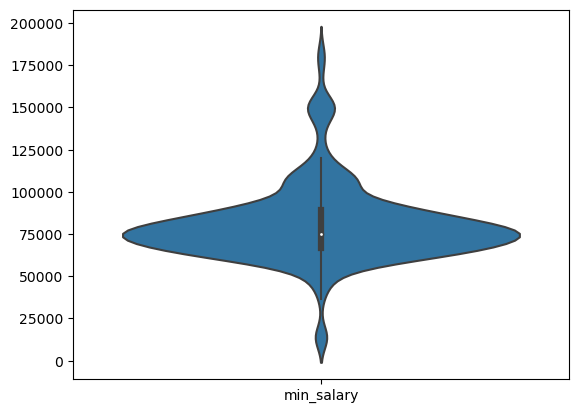

In [48]:
salary_distribution_department(df,'Information & Communication Technology')

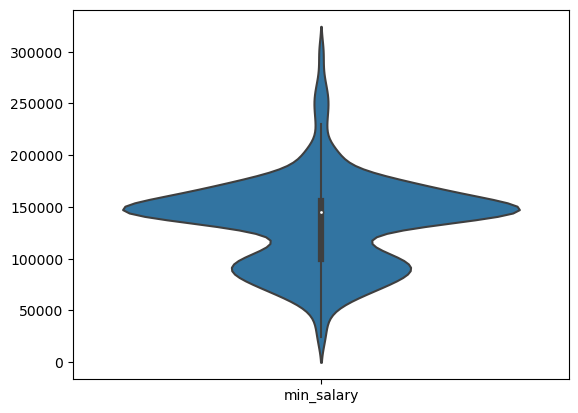

In [49]:
salary_distribution_department(df,'CEO & General Management')

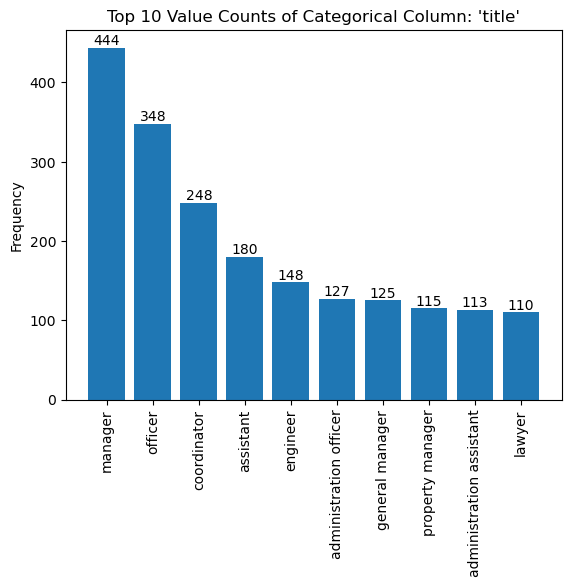

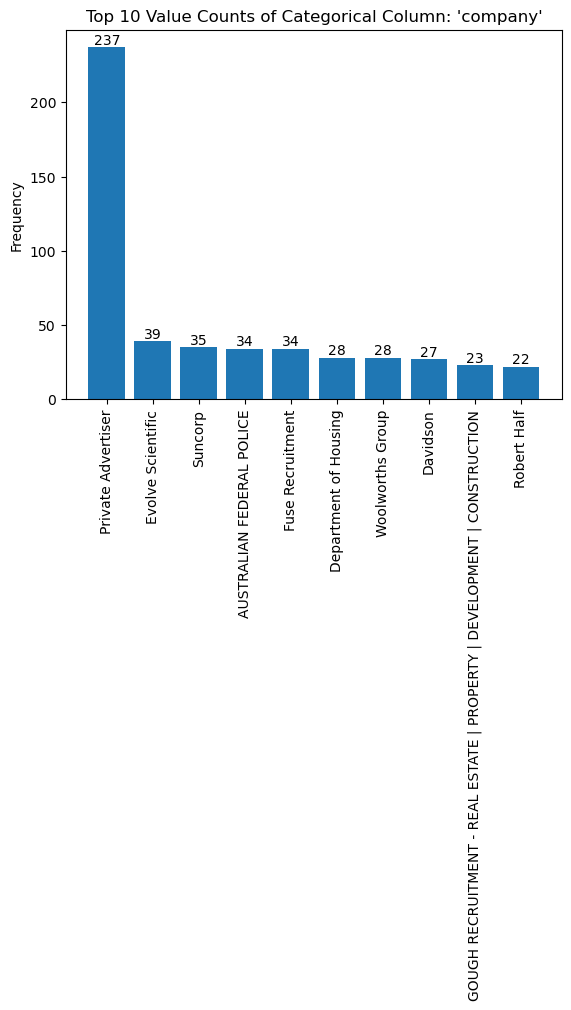

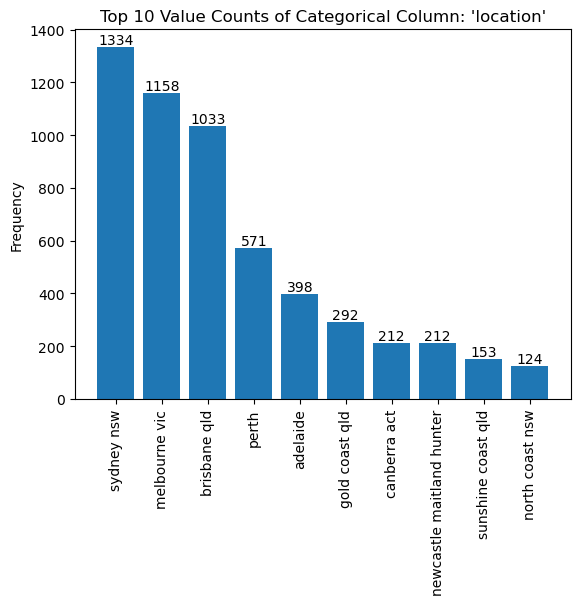

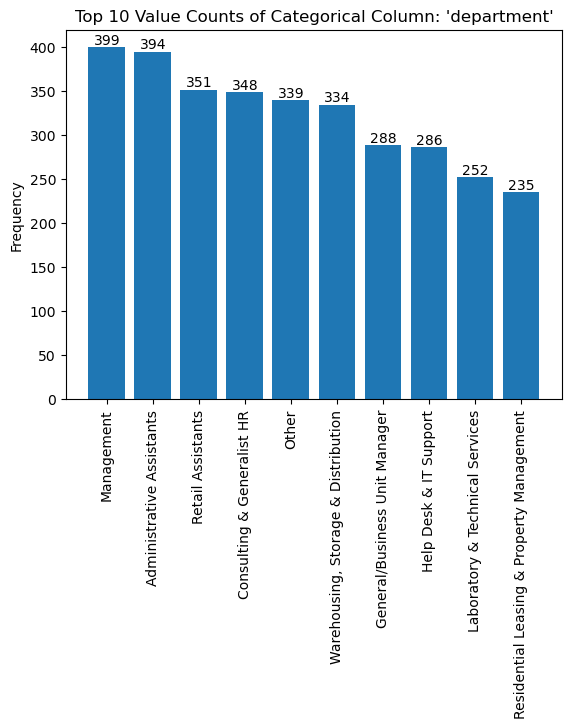

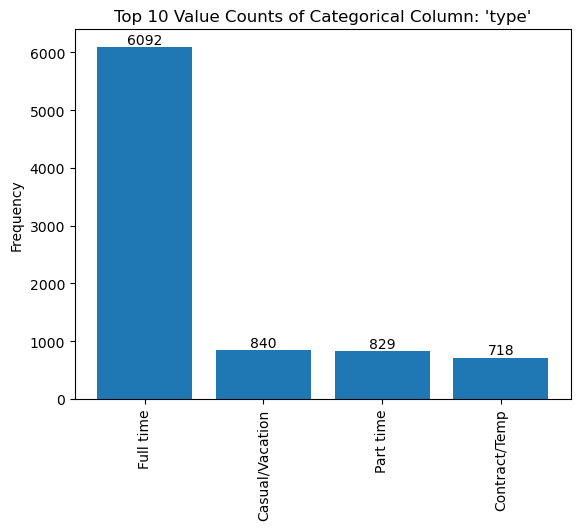

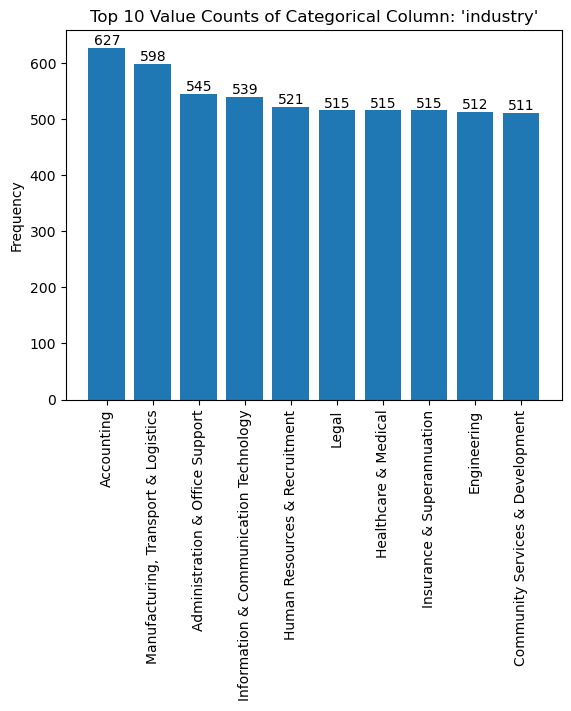

In [50]:
def plot_categorical_vars_distribution(df, thresh=30, xticks_rotation=90):
    # select categorical columns
    categorical_colnames = df.select_dtypes(include=['object']).columns.to_list()
    
    # loop through categorical columns only
    for col in categorical_colnames:
        df_count = df[col].value_counts()[:thresh]
        x = df_count.index
        y = df_count
        plt.bar(x, y)
        plt.title("Top "+str(thresh)+" Value Counts of Categorical Column: '" + col + "'")
        plt.xticks(rotation=xticks_rotation)
        plt.ylabel("Frequency")
        
        # annotate the bar values
        offset = max(y) * 0.02
        for x_val, y_val in zip(x, y):
            label = "{:.0f}".format(y_val)
            plt.annotate(label, (x_val, y_val + offset), ha='center', va='center')
            
        plt.show()

plot_categorical_vars_distribution(df_safe4, thresh=10)

__Due to the high number of unique values we just plotted the value counts for the top 10 most frequent unique values__ on each categorical column.

Now let's __plot the numerical columns using histograms and boxplots.__

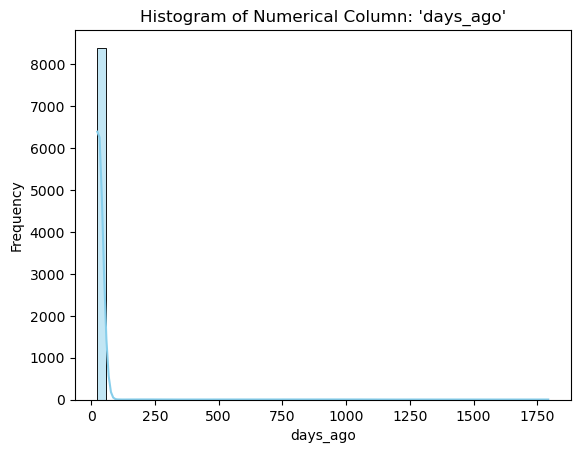

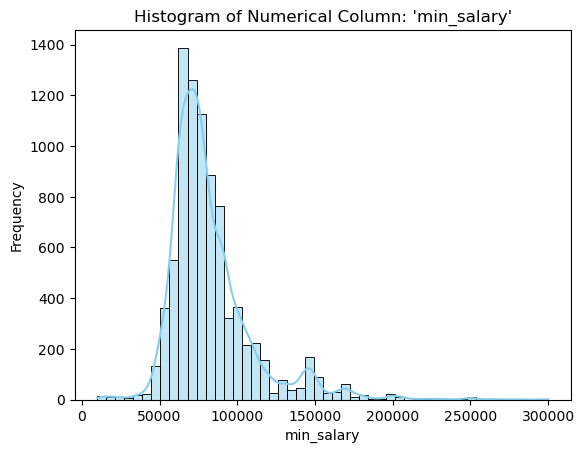

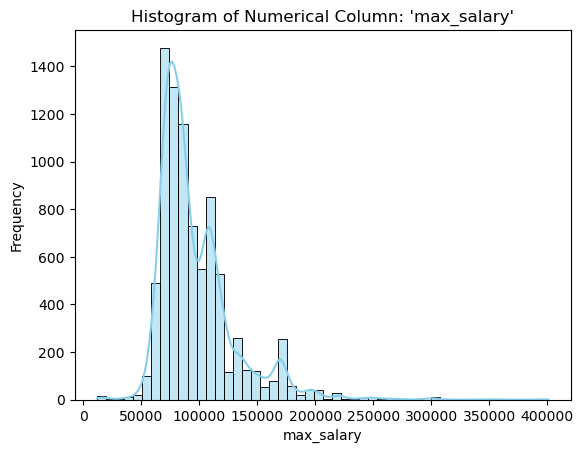

In [51]:
import seaborn as sns

def plot_numerical_vars_distribution(df, thresh=-1, plot='histogram'):
    # select numerical columns
    numerical_colnames = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.to_list()
    
    # loop through numerical columns only
    for col in numerical_colnames:
        # plot using seaborn
        if thresh == -1: thresh = -len(df)
        if plot == 'histogram':
            sns.histplot(sorted(df[col])[:-thresh], bins=50, kde=True, color='skyblue', edgecolor='black')
            plt.ticklabel_format(style='plain', axis='x')
            plt.ylabel("Frequency")
            plt.xlabel(col)
        elif plot == 'boxplot':
            sns.boxplot(sorted(df[col])[:-thresh], palette="vlag", orient="h")
            plt.xlabel("'" + col + "' values")
        
        # set title and labels
        plt.title(plot.title() + " of Numerical Column: '" + col + "'")
        plt.show()

plot_numerical_vars_distribution(df)

Our histograms __demonstrate extreme values at the right end of the plot__.

Let's __remove these points from our plots using the thresh parameter.__

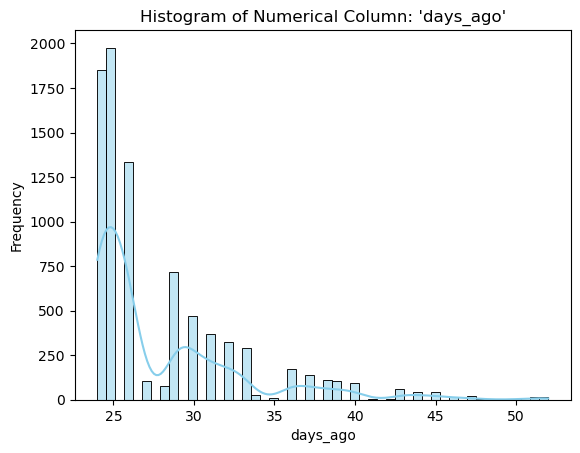

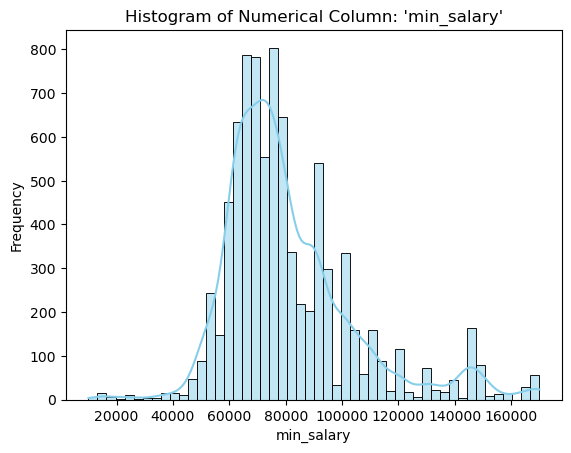

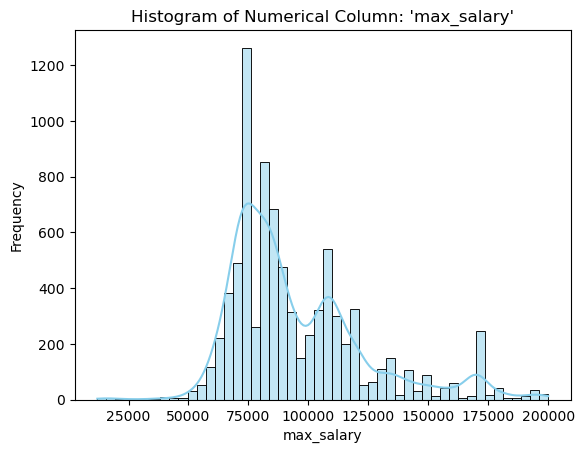

In [52]:
# plotting histograms without top 100 values from the right
plot_numerical_vars_distribution(df, thresh=100)

Now we truly see were the majority of our data is.

Let's plot boxplots.

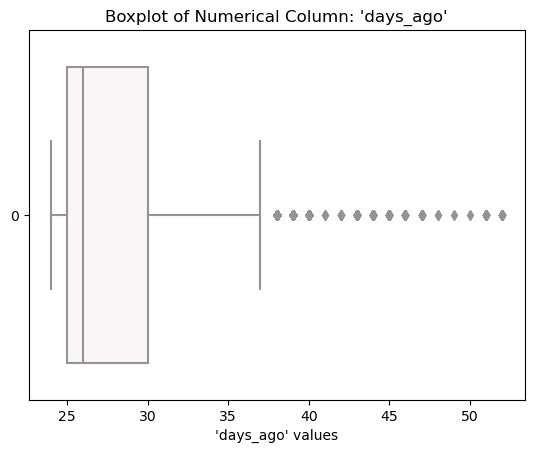

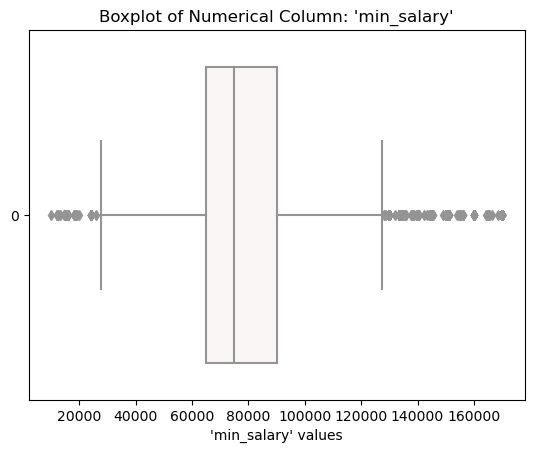

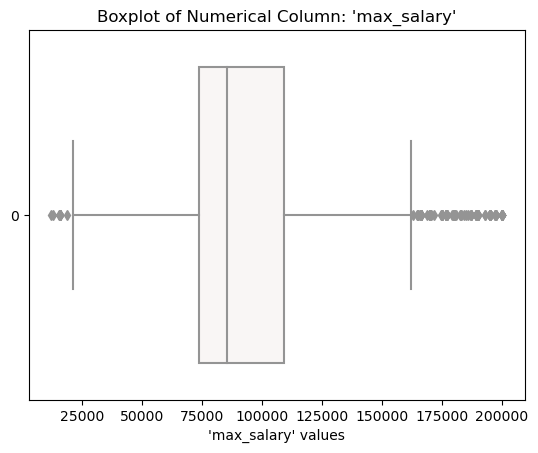

In [53]:
plot_numerical_vars_distribution(df, thresh=100, plot='boxplot')

These boxplots show lots of outliers outside of the range __[q1 - 1.5 * IQR, q3 + 1.5 * IQR]__

Finally we will calculate the __skewness and kurtosis for each numerical column__.

In [54]:
def display_skewness_and_kurtosis_numerical_vars(df):
    # select numerical columns
    numerical_colnames = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.to_list()
    
    # loop through numerical columns only
    for col in numerical_colnames:
        print("Evaluating NUMERICAL COLUMN: '" + col + "'")
        print("Skewness: %f" % df[col].skew())
        print("Kurtosis: %f" % df[col].kurt())
        print("-"*40)
        
display_skewness_and_kurtosis_numerical_vars(df)

Evaluating NUMERICAL COLUMN: 'days_ago'
Skewness: 12.678037
Kurtosis: 169.376132
----------------------------------------
Evaluating NUMERICAL COLUMN: 'min_salary'
Skewness: 2.079802
Kurtosis: 7.082669
----------------------------------------
Evaluating NUMERICAL COLUMN: 'max_salary'
Skewness: 1.940639
Kurtosis: 6.439499
----------------------------------------


### Step 4. Pandas profiling for EDA (exploratory data analysis)

To generate the report we need to install some dependencies and then we are able to generate using ydata_profiling module.

In [55]:
# !pip install --upgrade Pillow

In [56]:
# !pip install ydata_profiling

In [57]:
from ydata_profiling import ProfileReport

profile_report = ProfileReport(df, title="Pandas_Profiling_Report")

profile_report.to_file('Pandas_Profiling_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Step 5. Encoding methods, creating new numerical columns

Since we are applying clustering methods, label encoding will be sufficient to place categories within similar space.

In [58]:
df_safe5 = df.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding_to_categorical_vars(df, exceptions=[]):
    # using label encoder
    le = LabelEncoder()

    # loop through categorical columns and update them transforming them to numerical
    for col in df.select_dtypes(include=['object']).columns.to_list():
        if col in exceptions: continue
        df[col] = le.fit_transform(df[col])

apply_label_encoding_to_categorical_vars(df)

df

,title,company,location,department,type,industry,days_ago,min_salary,max_salary
0,546,132,100,8,3,5,24,73840.0,73840.0
1,469,900,43,37,2,5,24,75000.0,150000.0
2,546,1081,94,37,2,5,26,83200.0,91520.0
3,77,3125,90,45,2,5,24,82000.0,84000.0
4,604,4345,11,37,2,5,25,85280.0,87360.0
...,...,...,...,...,...,...,...,...,...
8474,14,4952,91,3,1,0,24,79040.0,83200.0
8475,541,1693,91,93,2,14,24,85340.0,99700.0
8476,559,2433,65,202,1,17,24,97760.0,97760.0
8477,37,906,31,153,2,17,24,65000.0,72800.0


In [60]:
df[df['min_salary']<10000]

,title,company,location,department,type,industry,days_ago,min_salary,max_salary


In [61]:
df.dtypes

title           int32
company         int32
location        int32
department      int32
type            int32
industry        int32
days_ago        int64
min_salary    float64
max_salary    float64
dtype: object

### Step 6. Outlier identification (with boxplots and IQR)

In [62]:
def plot_column_outliers(df, col, iqr_factor=1.5):
    # set x as count of transactions per service area
    x = df.index

    # set y as sum of transactions per service area
    y = df[col]
    
    # plot horizontal lines lower and upper limits of IQR range for outliers
    q1 = y.quantile(0.25)
    q3 = y.quantile(0.75)
    IQR = q3 - q1
    lower = q1 - iqr_factor * IQR
    upper = q3 + iqr_factor * IQR
    plt.axhline(lower, ls='--', color='r', alpha=0.25)
    plt.axhline(upper, ls='--', color='r', alpha=0.25)
    
    # color outliers
    hues, outliers = [], []
    for index, y_value in y.items():
        if y_value > upper or y_value < lower:
            outliers.append(index)
            hues.append('outlier')
            continue
        hues.append('non-outlier')
    
    # plot scatterplot
    sns.scatterplot(x = x, y = y, hue=hues)
    plt.xlabel('Index')
    plt.ylabel("'" + col + "' value")
    plt.xticks(rotation=45)
    plt.title("OUTLIER DETECTION for column: '" + col + "'")
    plt.show()
    
    return df.loc[outliers]

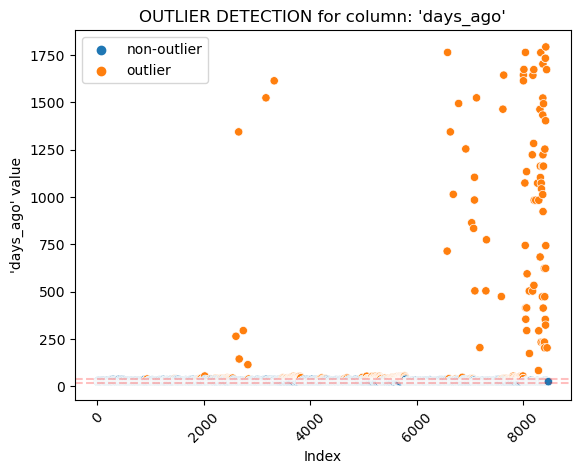

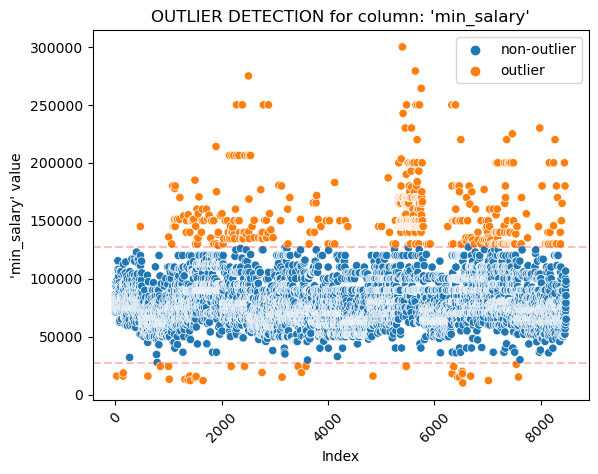

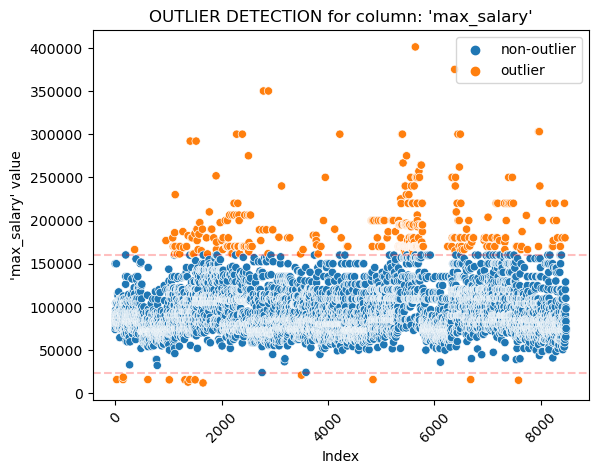

In [63]:
def plot_and_save_outliers_all_columns(df):
    outliers = {}
    for col in df.columns:
        outliers[col] = plot_column_outliers(df, col)
    return outliers

num_cols = ['days_ago','min_salary','max_salary']

all_outliers = plot_and_save_outliers_all_columns(df[num_cols])

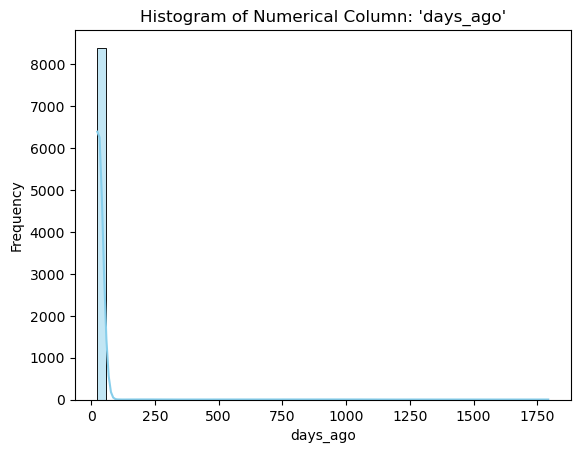

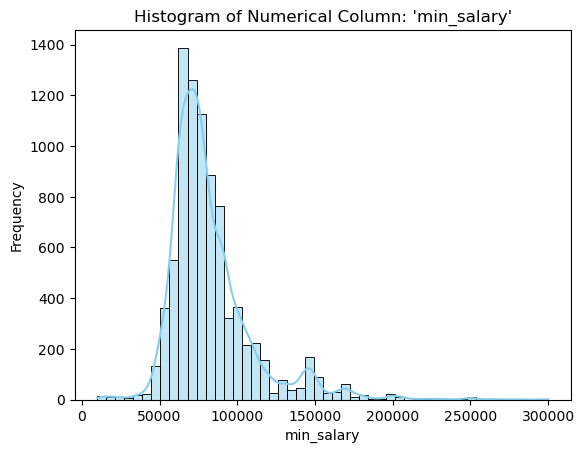

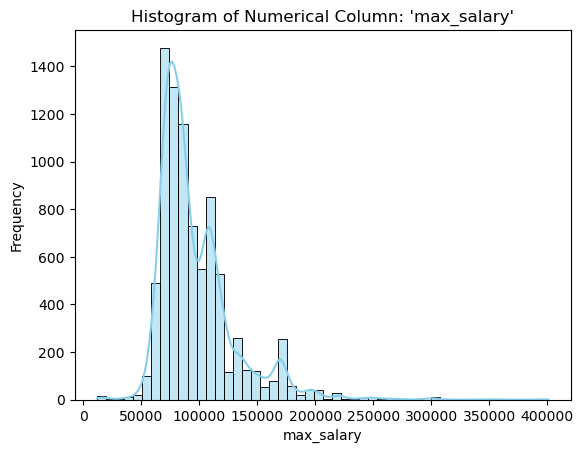

In [64]:
plot_numerical_vars_distribution(df[num_cols], plot='histogram')

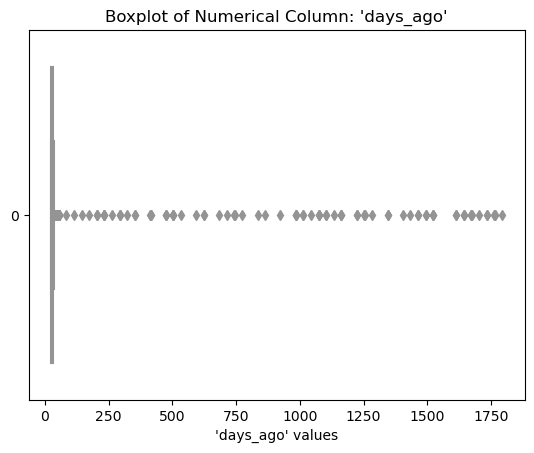

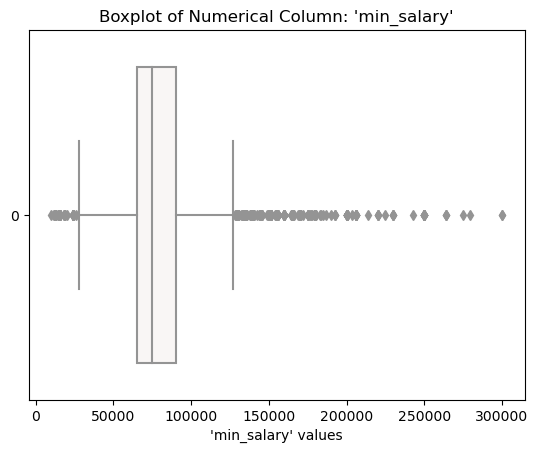

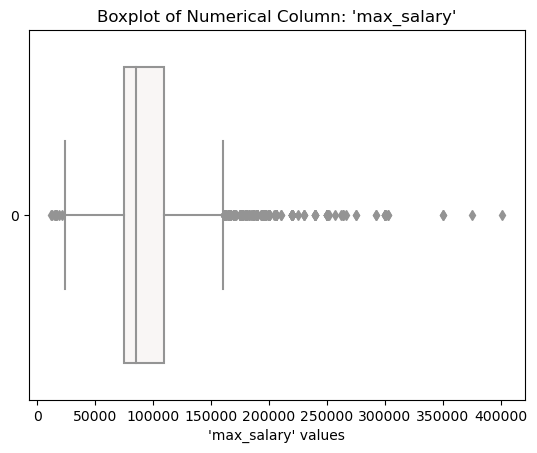

In [65]:
plot_numerical_vars_distribution(df[num_cols], plot='boxplot')

Based on the scatterplots, histograms, and boxplots, all the numerical columns have outliers
- days_ago
- min_salary
- max_salary

These outliers are saved into our variable 'all_outliers' dictionary. Let's see some rows of these outliers.

In [66]:
display_shape_and_colnames(all_outliers['days_ago'])
all_outliers['days_ago'].tail()

Number of Rows: 628
Number of Columns: 3
Index(['days_ago', 'min_salary', 'max_salary'], dtype='object')


,days_ago,min_salary,max_salary
8427,623,50000.0,56940.0
8429,743,62400.0,72800.0
8430,1793,70000.0,87000.0
8445,1673,80821.0,94300.0
8454,203,83200.0,93600.0


In [67]:
display_shape_and_colnames(all_outliers['min_salary'])
all_outliers['min_salary'].head()

Number of Rows: 659
Number of Columns: 3
Index(['days_ago', 'min_salary', 'max_salary'], dtype='object')


,days_ago,min_salary,max_salary
29,24,15900.0,15900.0
147,25,15900.0,15900.0
151,25,18550.0,18550.0
472,25,145004.0,150257.0
614,24,15899.0,15899.0


In [68]:
display_shape_and_colnames(all_outliers['max_salary'])
all_outliers['max_salary'].head()

Number of Rows: 532
Number of Columns: 3
Index(['days_ago', 'min_salary', 'max_salary'], dtype='object')


,days_ago,min_salary,max_salary
29,24,15900.0,15900.0
147,25,15900.0,15900.0
151,25,18550.0,18550.0
365,25,83740.8,166400.0
614,24,15899.0,15899.0


We __succesfully used the standard '1.5xIQR' rule to identify outliers__ (data points) that have values outside this range:

- __[q1 - 1.5*IQR; q3 + 1.5*IQR]__

### Step 7. Addressing outliers with Quantile-based flooring and capping, Trimming, and Log Transformation
We will use the 3 techniques to get rid of the identified outliers.

#### Quantile based Flooring and Capping

In [69]:
df_safe7 = df.copy()

In [70]:
outlier_columns = [ 'days_ago', 'min_salary', 'max_salary']

In [71]:
import numpy as np

def apply_flooring_capping_on_col(df, col, floor_=0.01, ceil_=0.99):
    # set floor and ceil
    floor = (df[col].quantile(floor_))
    ceil = (df[col].quantile(ceil_))
    print("Column '"+col+"' Floor : ", floor)
    print("Column '"+col+"' Ceil : ", ceil)
    
    # apply flooring and capping (ceiling) on a copy of the dataframe
    df_copy = df.copy()
    df_copy[col] = np.where(df[col] < floor, floor, df_copy[col])
    df_copy[col] = np.where(df[col] > ceil , ceil , df_copy[col])
    return df_copy

In [72]:
def plot_boxplot_before_vs_after(df1, df2, col, sharey=False, func='flooring_capping'):
    # plot both boxplots (from each dataframe) in subplots
    fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(10,5), sharey=sharey)
    ax1.boxplot(df1[col])
    ax2.boxplot(df2[col])
    ax1.set_title("Boxplot of '" + col + "' BEFORE " + func)
    ax2.set_title("Boxplot of '" + col + "' AFTER " + func)
    ax1.ticklabel_format(style='plain', axis='y')
    plt.show()

In [73]:
def apply_and_plot_all_columns(df, cols, shareys=[], floor_=0.01, ceil_=0.99, func='flooring_capping', plot=True, return_df=False):
    if shareys == []: shareys = [False for _ in range(len(cols))]
    
    # loop through columns, apply the technique and plot the results comparing boxplots or histograms
    for i, col in enumerate(cols):
        if func == 'flooring_capping':
            df_nonoutliers = apply_flooring_capping_on_col(df, col, floor_=floor_, ceil_=ceil_)
            if plot: plot_boxplot_before_vs_after(df, df_nonoutliers, col, shareys[i], func)
        elif func == 'trimming':
            df_nonoutliers = apply_trimming_on_col(df, col, lower_=floor_, upper_=ceil_)
            if plot: plot_boxplot_before_vs_after(df, df_nonoutliers, col, shareys[i], func)
        elif func == 'log_transformation':
            df_nonoutliers = apply_log_transformation_on_col(df, col)
            if plot: plot_log_transformation_hist(df, df_nonoutliers, col)
    
    if return_df: return df_nonoutliers

Column 'days_ago' Floor :  24.0
Column 'days_ago' Ceil :  120.59999999998035


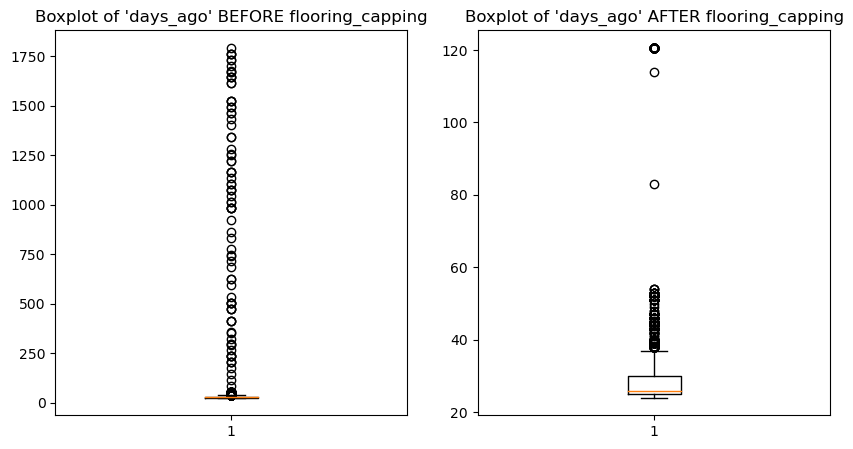

Column 'min_salary' Floor :  45390.0
Column 'min_salary' Ceil :  180000.0


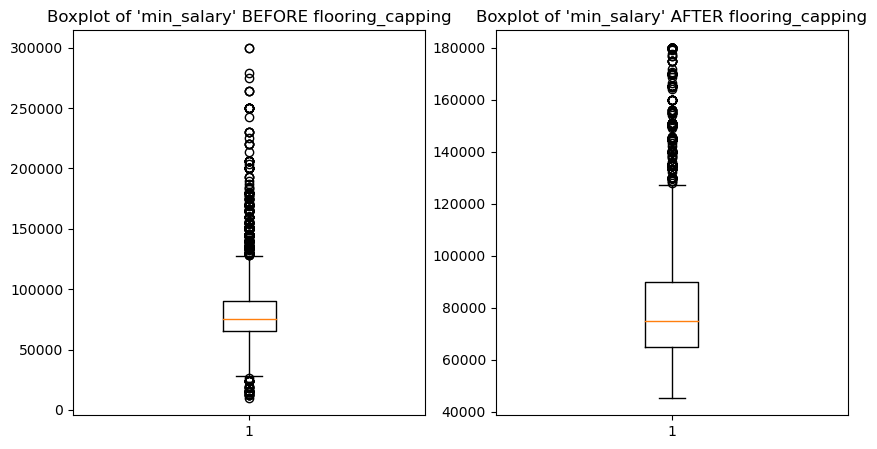

Column 'max_salary' Floor :  54730.728
Column 'max_salary' Ceil :  204297.59999999864


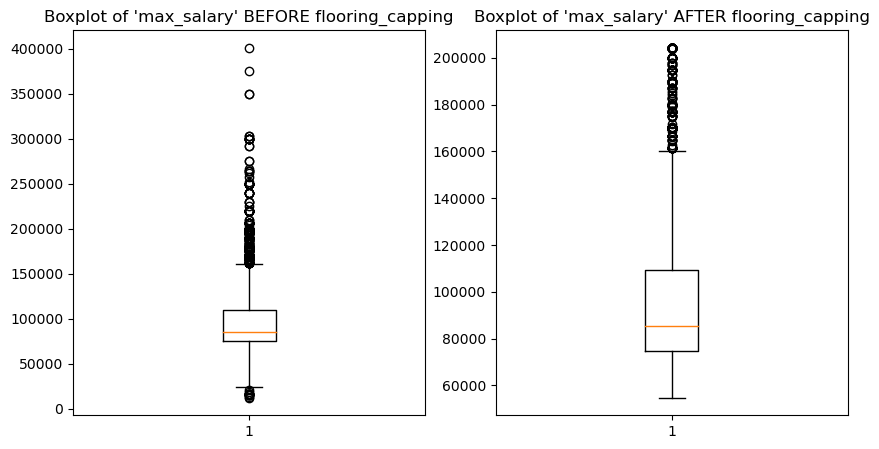

In [74]:
apply_and_plot_all_columns(df, outlier_columns,  floor_=0.01, ceil_=0.99)

We have decided not to share Y values for the last 2 columns (min_salary and max_salary), due to the extreme values present in the data (which makes the boxplot non-visible).

Results for columns like 'days_ago', 'min_salary', 'max_salary' are satisfactory as most outliers have been removed and we are closer to normal distributions.

We could also keep testing with different floor and ceil parameters, they were set as 0.01 and 0.99 respectively to change extreme values probably wrongly measured from our data.

Let's proceed with trimming now .

#### Trimming

In [75]:
def apply_trimming_on_col(df, col, lower_=0.01, upper_=0.99):
    # set floor and ceil
    lower = (df[col].quantile(lower_))
    upper = (df[col].quantile(upper_))
    print("Column '"+col+"' Min Possible Value : ", lower)
    print("Column '"+col+"' Max Possible Value : ", upper)
    print("Number of Rows BEFORE Trimming:", df.shape[0])
    
    # apply trimming on a copy of the dataframe
    df_copy =  df[(df[col] <= upper) & (df[col] >= lower)]
    print("Number of Rows AFTER Trimming:", df_copy.shape[0])
    print("Rows deleted:", df.shape[0] - df_copy.shape[0])
    return df_copy

Column 'days_ago' Min Possible Value :  24.0
Column 'days_ago' Max Possible Value :  45.0
Number of Rows BEFORE Trimming: 8479
Number of Rows AFTER Trimming: 8306
Rows deleted: 173


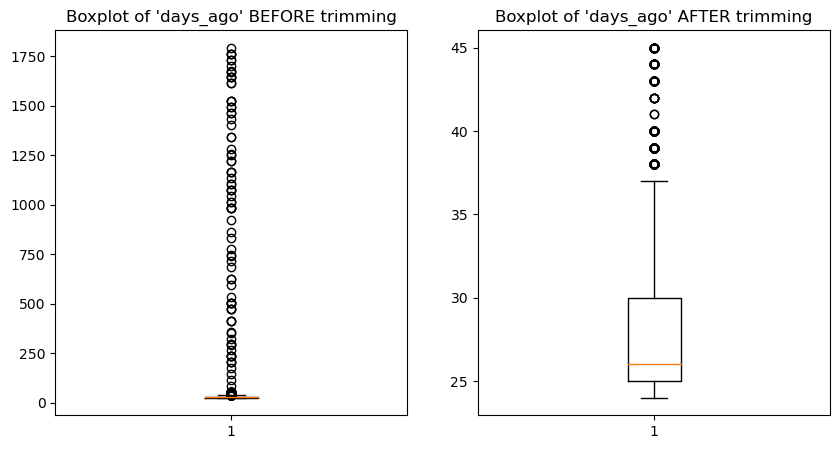

Column 'min_salary' Min Possible Value :  50323.520000000004
Column 'min_salary' Max Possible Value :  154074.70199999947
Number of Rows BEFORE Trimming: 8479
Number of Rows AFTER Trimming: 8055
Rows deleted: 424


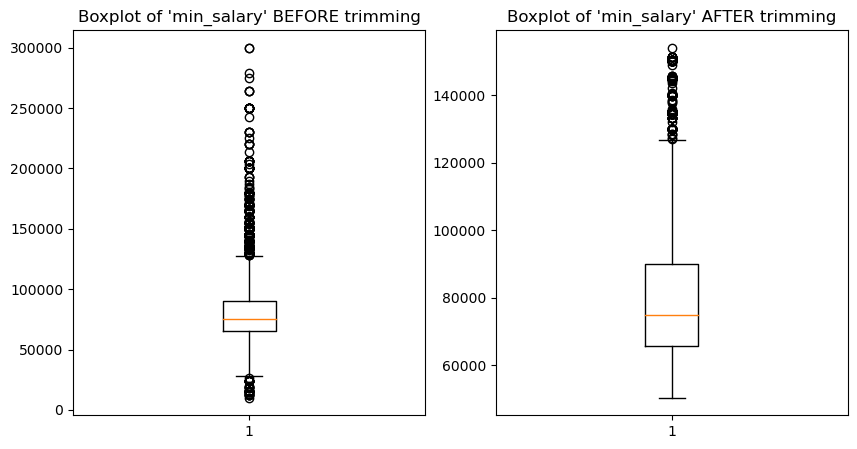

Column 'max_salary' Min Possible Value :  60000.0
Column 'max_salary' Max Possible Value :  180000.0
Number of Rows BEFORE Trimming: 8479
Number of Rows AFTER Trimming: 8131
Rows deleted: 348


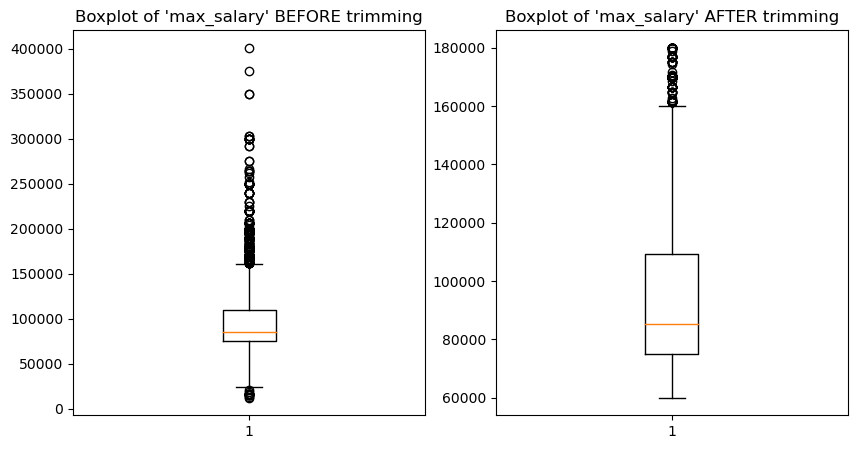

In [76]:
apply_and_plot_all_columns(df, outlier_columns, floor_=0.025, ceil_=0.975, func='trimming')

We can see that most outliers were deleted once again, however it is harder to determine a suitable value for the trimming.

We decided to trim the top 2.5% and lower 2.5% as they contain the most extreme values and the sum of both is 5% which doesn't represent a large amount of our data.


Let's do Log Transformation to see the difference

#### Log Transformation

In [77]:
def apply_log_transformation_on_col(df, col):
    # display the skew before applying
    print("Column '"+col+"'")
    print("Skew BEFORE log transformation:", df[col].skew().round(2))

    # Log Transformation on a copy of the dataframe
    df_log = df.copy()
    df_log[col] = df[col].map(lambda i : np.log(i) if i > 0 else 0)
    
    # display the skew after applying
    print("Skew AFTER log transformation:", df_log[col].skew().round(2))
    return df_log

In [78]:
def plot_log_transformation_hist(df1, df2, col):
    # plot histograms of log transformation comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))    
    ax1.hist(df1[col], bins=15)
    ax1.set_title("'" + col + "' Histogram BEFORE Log")
    ax2.hist(df2[col], bins=15)
    ax2.set_title("'" + col + "' Histogram AFTER Log")
    plt.show()

Column 'days_ago'
Skew BEFORE log transformation: 12.68
Skew AFTER log transformation: 7.83


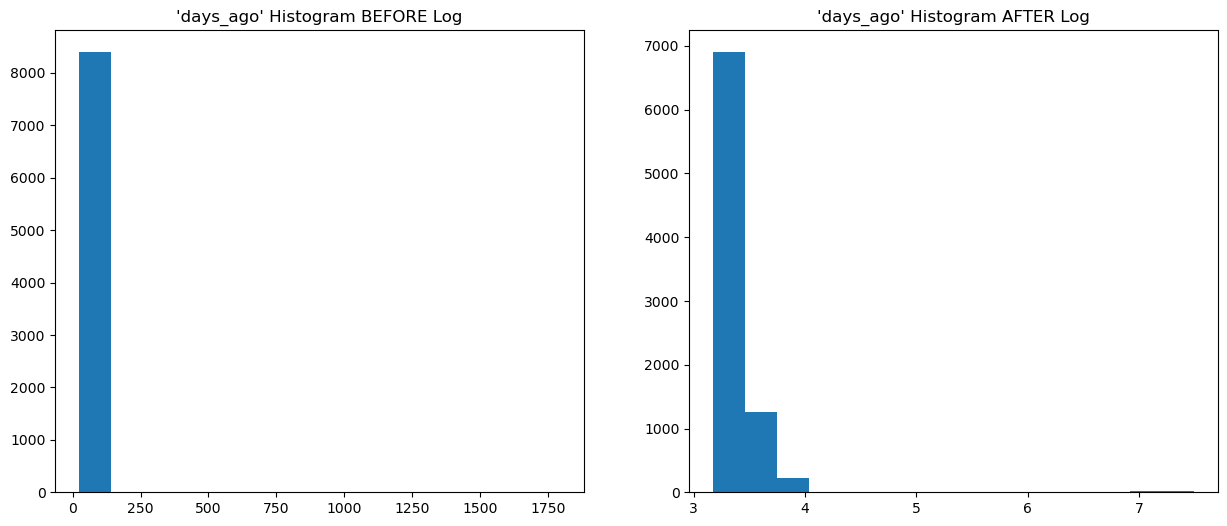

Column 'min_salary'
Skew BEFORE log transformation: 2.08
Skew AFTER log transformation: 0.19


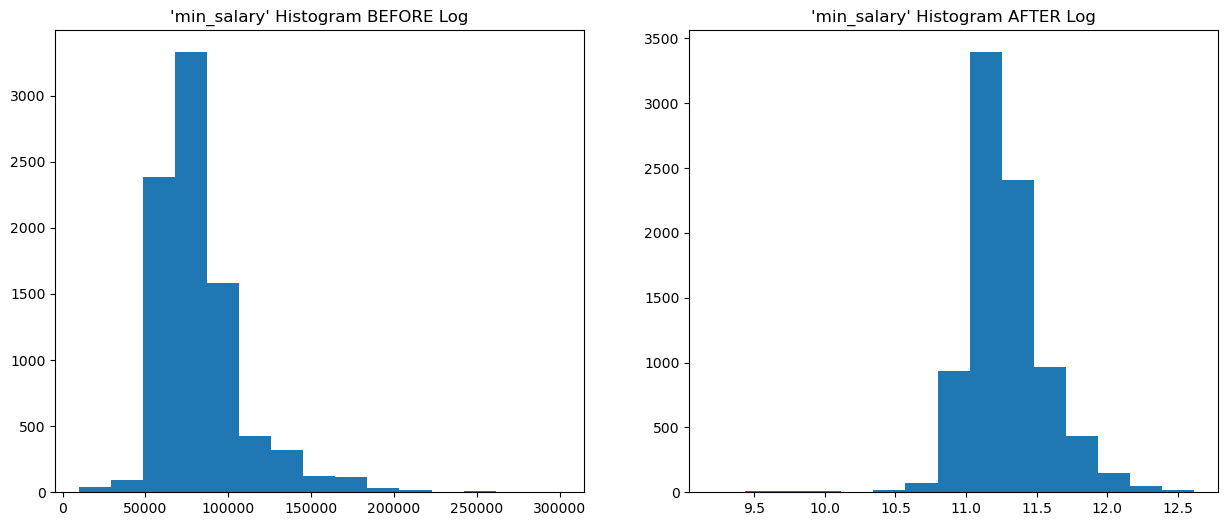

Column 'max_salary'
Skew BEFORE log transformation: 1.94
Skew AFTER log transformation: 0.42


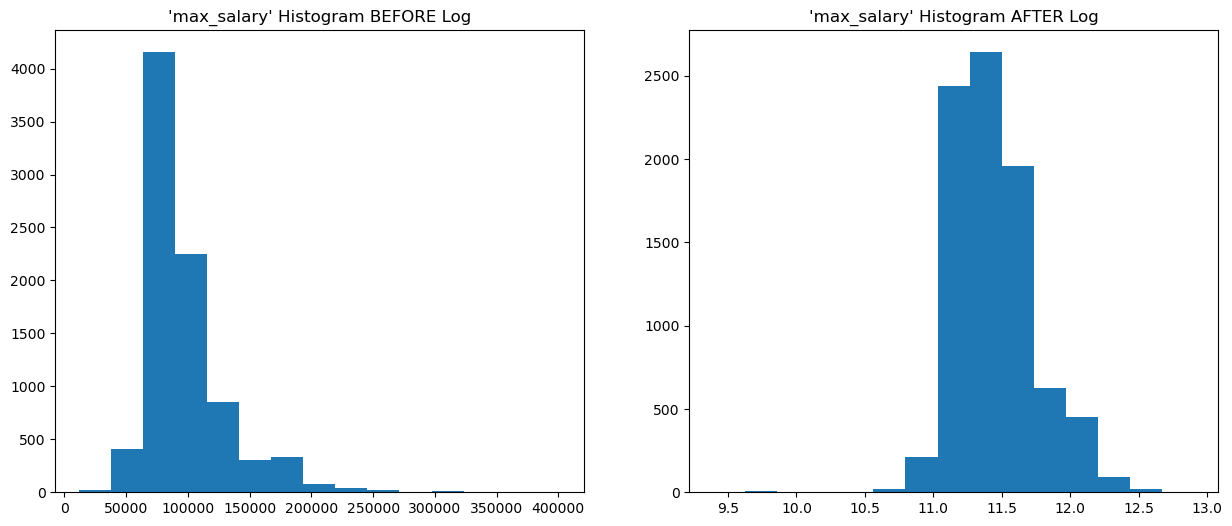

In [79]:
apply_and_plot_all_columns(df, outlier_columns, func='log_transformation')

The Log Transformation approach has worked well for the columns: 'min_salary' and 'max_salary', as they appear to have a closer normal distribution after the technique.

They also present a skew closer to zero.

However, for 'days_ago' this technique barely did made any meaningful change in the distribution of values.

Step Conclusion: Based on the comparison and techniques, we decided to apply:
- __Trimming on column 'days_ago'__
- __Flooring and Ceiling on columns 'min_salary' and 'max_salary'__ and then __Log Transformation on both of them as well__

In [80]:
df_safe8 = df.copy()

In [81]:
df = df_safe8

In [82]:
df = apply_and_plot_all_columns(df, ['days_ago'],                 floor_=0.025, ceil_=0.975, func='trimming',   plot=False, return_df=True)
df = apply_and_plot_all_columns(df, ['min_salary'], floor_=0.025, ceil_=0.975, func='flooring_capping',   plot=False, return_df=True)
df = apply_and_plot_all_columns(df, ['min_salary'], floor_=0.025, ceil_=0.975, func='log_transformation', plot=False, return_df=True)
df = apply_and_plot_all_columns(df, ['max_salary'], floor_=0.025, ceil_=0.975, func='flooring_capping',   plot=False, return_df=True)
df = apply_and_plot_all_columns(df, ['max_salary'], floor_=0.025, ceil_=0.975, func='log_transformation', plot=False, return_df=True)
df

Column 'days_ago' Min Possible Value :  24.0
Column 'days_ago' Max Possible Value :  45.0
Number of Rows BEFORE Trimming: 8479
Number of Rows AFTER Trimming: 8306
Rows deleted: 173
Column 'min_salary' Floor :  50086.399999999994
Column 'min_salary' Ceil :  150380.0
Column 'min_salary'
Skew BEFORE log transformation: 1.37
Skew AFTER log transformation: 0.71
Column 'max_salary' Floor :  60000.0
Column 'max_salary' Ceil :  180000.0
Column 'max_salary'
Skew BEFORE log transformation: 1.27
Skew AFTER log transformation: 0.71


,title,company,location,department,type,industry,days_ago,min_salary,max_salary
0,546,132,100,8,3,5,24,11.209656,11.209656
1,469,900,43,37,2,5,24,11.225243,11.918391
2,546,1081,94,37,2,5,26,11.329003,11.424313
3,77,3125,90,45,2,5,24,11.314475,11.338572
4,604,4345,11,37,2,5,25,11.353695,11.377793
...,...,...,...,...,...,...,...,...,...
8474,14,4952,91,3,1,0,24,11.277709,11.329003
8475,541,1693,91,93,2,14,24,11.354399,11.509921
8476,559,2433,65,202,1,17,24,11.490271,11.490271
8477,37,906,31,153,2,17,24,11.082143,11.195471


In [83]:
df_safe9 = df.copy()

### Step 8. Unsupervised learning methods

Our last step is to apply unsupervised learning methods, we will apply 2 methods, let's start with KMeans.

#### KMeans

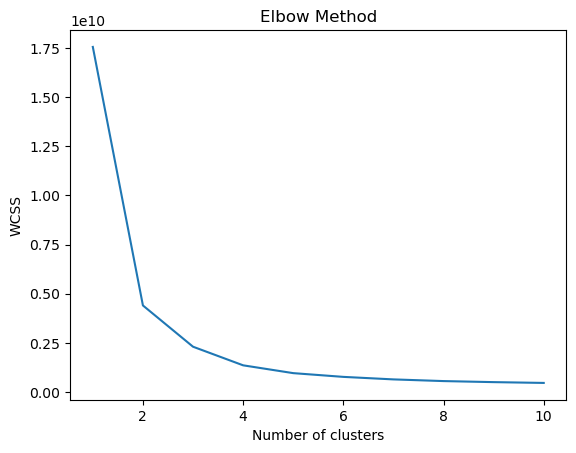

In [99]:
### Elbow method to find the best number of clusters
def plot_elbow_method(df, max_clusters):
    wcss = []
    for i in range(1, max_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(df, 11)

__Based on the Elbow method we find out that after 4 clusters the WCSS metric starts to converge.__

So we will __choose 4 as the number of clusters.__

In [90]:
def apply_kmeans_on_2_cols(df, cols, n_clusters=4, cluster_label_colname='cluster'):
    if len(cols) != 2: return
    # apply KMeans with 4 clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[cols])
    
    # add cluster label to a copy of the dataframe
    df_clustering = df.copy()
    df_clustering[cluster_label_colname] = kmeans.labels_
    return df_clustering

In [108]:
def plot_clusters(df, cols, hue='cluster', figsize=(8,4)):
    if len(cols) != 2: return
    # plot clustering method of KMeans
    plt.figure(figsize=figsize)
    sns.scatterplot(data=df, x=cols[0], y=cols[1], hue=df[hue], palette='deep')
    plt.title("KMeans Clustering '"+cols[0]+"' vs '"+cols[1]+"'")
    plt.show()

Let's try clustering a few pair of columns:
- type vs min_salary
- type vs max_salary
- min_salary vs max_salary
- days_ago vs min_salary
- days_ago vs max_salary
- industry vs min_salary
- industry vs max_salary

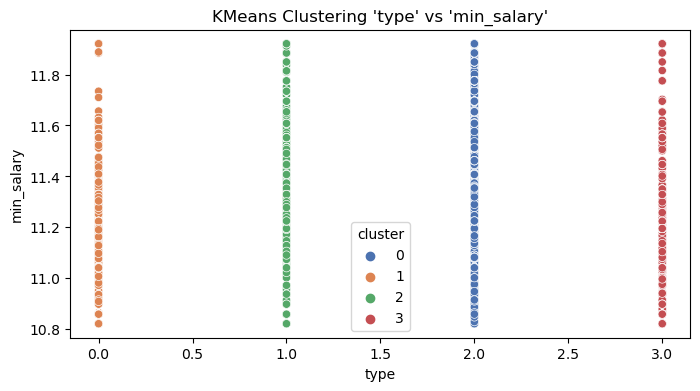

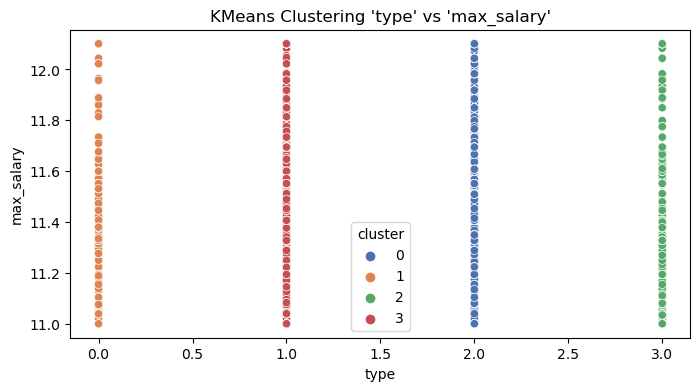

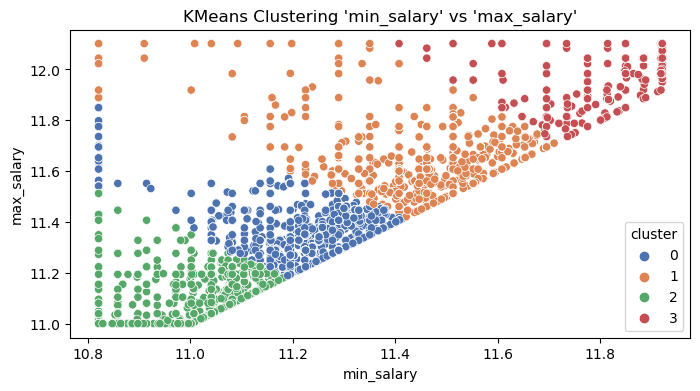

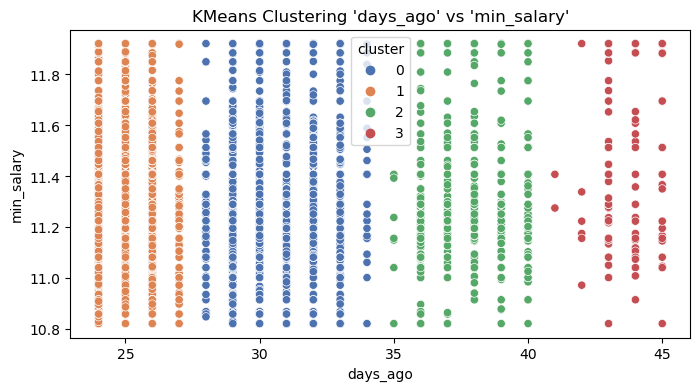

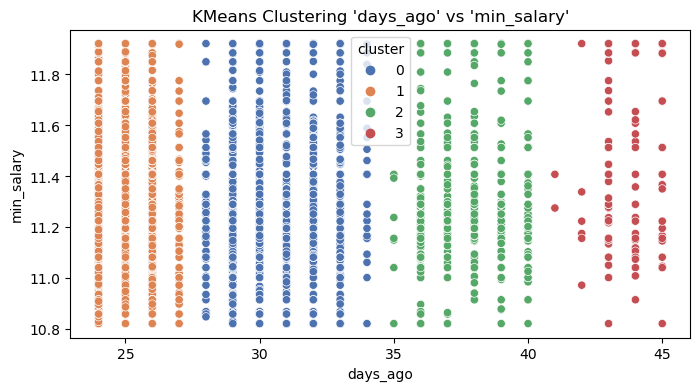

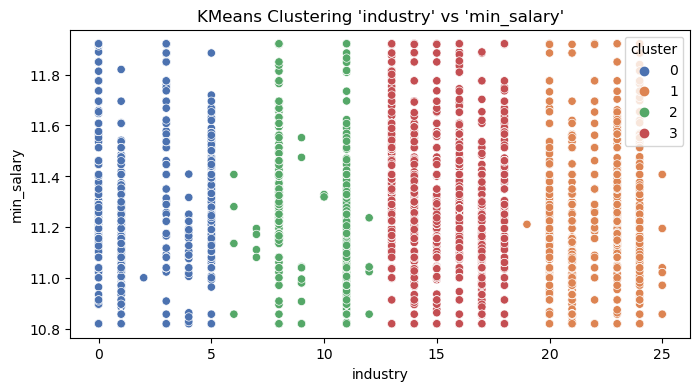

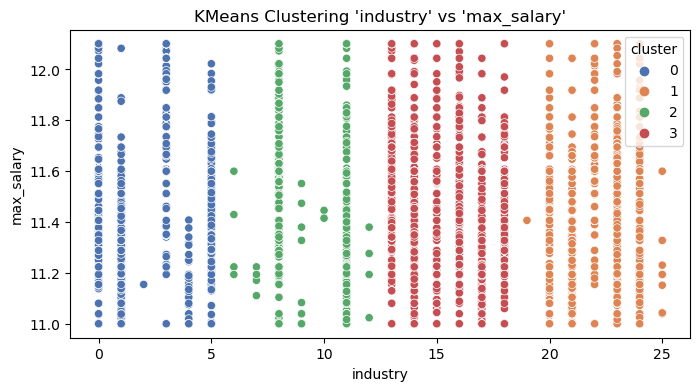

In [110]:
col_pairs = [['type', 'min_salary'], ['type', 'max_salary'], ['min_salary', 'max_salary'],
             ['days_ago', 'min_salary'], ['days_ago', 'min_salary'], ['industry', 'min_salary'], ['industry', 'max_salary']]

def apply_and_plot_kmeans_clustering(df, col_pairs, n_clusters=4, cluster_label_colname='cluster', figsize=(8,4)):
    for cols in col_pairs:
        df_clustering = apply_kmeans_on_2_cols(df, cols, n_clusters=n_clusters, cluster_label_colname=cluster_label_colname)
        plot_clusters(df_clustering, cols, hue=cluster_label_colname, figsize=figsize)
        
apply_and_plot_kmeans_clustering(df, col_pairs)

__Unfortunately, our original data does not have many numerical columns.__

However, based on the few clustering experiments that we could do, __we gained the following insights:__
- All __types of jobs (full-time, part-time, casual, etc.__) present __wide range of salaries__.
- The __number of days ellapsed__ since the job was posted also present __wide salary ranges__, however, the number of jobs tend to decrease when more days have passed.
- There are __few industries that present lower salary ranges__, due to the __lack of data of these specific industries.__
- For __min vs max salaries__, we have identified __4 groups__ that could actually represent the __entry-level, junior, senior, and executive roles__. We also visualize a clear line that prevents max salaries from being lower than min salaries, meaning that we succesfully extracted and segmented the salaries.